# PE084DS-5, Final Project:
# Topic: Business Cycle and Asset Allocation
## This program is to investigate the performance of gold, stock, exchange rate and bond against GDP growth rate and inflation rate of Hong Kong in the past 10 years.


### prepared by :
### P5 Boys Club:
### xxx (7),
### xxx (11),
### xxx (20),
### xxx (24),
### Jack Wong (25)

# 1. Data Retrieval

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import json
from plotly.subplots import make_subplots

### A) GDP Growth (annual %):
#### https://www.censtatd.gov.hk/en/web_table.html?id=310-31001#
#### GDP in chained (2022) dollars,Year-on-year % change, Customise Table/More Data: 2014-2023, choose Q1 to Q4 of each year

In [ ]:
# https://www.censtatd.gov.hk/en/web_table.html?id=310-31001#

# URL of the dataset
url1 = "https://www.censtatd.gov.hk/api/post.php"

# State the parameters to retreive the required data
param_dict ={
  "sv": {
    "CON": [
      "Raw_M_hkd_d",
      "YoY_1dp_%_s"
    ],
    "DEF": [
      "Raw_1dp_idx_n",
      "YoY_1dp_%_s"
    ],
    "SA1": [
      "QoQ_1dp_%_s"
    ],
  },
  "period": {
    "start": "201312",
    "end": "202312"
  },
  "id": "310-31001",
  "lang": "en"
}

# Send a POST request to the URL with the given parameters
response = requests.post(url1, data={'query': json.dumps(param_dict)})

# Check if valid response
if response.status_code == 200:

    # Parse the JSON response
    response_data = response.json()
    # print(response_data)

    # Extract the 'dataSet' from the JSON response
    data_set = response_data['dataSet']

    table_data = []
    for item in data_set:
      if len(item['period']) != 4: # skip 2019, 2020, 2021, ... data
        row = [item['period'], item['sv'], item['svDesc'], item['figure'], item['sd_value']]
        table_data.append(row)

    # Define headers for the table
    headers = ['period', 'sv', 'svDesc', 'figure', 'sd_value']

    # Create a DataFrame for plotting
    df_gdp = pd.DataFrame(table_data, columns=headers)
    print(df_gdp)

else:
  print("Failed to retrieve data")

     period   sv                       svDesc    figure sd_value
0    201312  CON                  HK$ million  694256.0         
1    201403  CON                  HK$ million  646145.0         
2    201406  CON                  HK$ million  630757.0         
3    201409  CON                  HK$ million  680094.0         
4    201412  CON                  HK$ million  712558.0         
..      ...  ...                          ...       ...      ...
200  202212  SA1  Quarter-to-quarter % change       0.0   [φ3],r
201  202303  SA1  Quarter-to-quarter % change       4.1        r
202  202306  SA1  Quarter-to-quarter % change       0.0   [φ3],r
203  202309  SA1  Quarter-to-quarter % change       0.2        r
204  202312  SA1  Quarter-to-quarter % change       0.2        r

[205 rows x 5 columns]


In [ ]:
print(df_gdp.info())
print('*'*40)
print(df_gdp.describe(include = 'all'))
print('*'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   period    205 non-null    object 
 1   sv        205 non-null    object 
 2   svDesc    205 non-null    object 
 3   figure    205 non-null    float64
 4   sd_value  205 non-null    object 
dtypes: float64(1), object(4)
memory usage: 8.1+ KB
None
****************************************
        period   sv                 svDesc         figure sd_value
count      205  205                    205     205.000000      205
unique      41    3                      4            NaN        3
top     201312  CON  Year-on-year % change            NaN         
freq         5   82                     82            NaN      165
mean       NaN  NaN                    NaN  141811.650732      NaN
std        NaN  NaN                    NaN  284757.854965      NaN
min        NaN  NaN                    NaN      -9.40000

In [ ]:
# change the 'figure' to numeric
df_gdp['figure'] = pd.to_numeric(df_gdp['figure'])

# change the 'period' to datetime format
df_gdp['period'] = pd.to_datetime(df_gdp['period'], format='%Y%m')

In [ ]:
print(df_gdp.info())
print('*'*40)
print(df_gdp.describe(include = 'all'))
print('*'*40)
df_gdp.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   period    205 non-null    datetime64[ns]
 1   sv        205 non-null    object        
 2   svDesc    205 non-null    object        
 3   figure    205 non-null    float64       
 4   sd_value  205 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 8.1+ KB
None
****************************************
                               period   sv                 svDesc  \
count                             205  205                    205   
unique                            NaN    3                      4   
top                               NaN  CON  Year-on-year % change   
freq                              NaN   82                     82   
mean    2018-11-30 19:19:01.463414528  NaN                    NaN   
min               2013-12-01 00:00:00  NaN 

period   sv                 svDesc    figure sd_value
3  2014-09-01  CON            HK$ million  680094.0         
78 2023-03-01  CON  Year-on-year % change       2.8        r
16 2017-12-01  CON            HK$ million  776271.0         
38 2023-06-01  CON            HK$ million  693816.0        r
55 2017-06-01  CON  Year-on-year % change       3.9

In [ ]:
# extract 'Per capita GDP at current market prices' from raw gdp dataframe
df_gdp_CONCHG = df_gdp[(df_gdp['sv'] == 'CON') & (df_gdp['svDesc'] == 'Year-on-year % change')]
df_gdp_CONCHG

period   sv                 svDesc  figure sd_value
41 2013-12-01  CON  Year-on-year % change     2.9         
42 2014-03-01  CON  Year-on-year % change     3.0         
43 2014-06-01  CON  Year-on-year % change     2.2         
44 2014-09-01  CON  Year-on-year % change     3.2         
45 2014-12-01  CON  Year-on-year % change     2.6         
46 2015-03-01  CON  Year-on-year % change     2.4         
47 2015-06-01  CON  Year-on-year % change     3.1         
48 2015-09-01  CON  Year-on-year % change     2.3         
49 2015-12-01  CON  Year-on-year % change     1.9         
50 2016-03-01  CON  Year-on-year % change     1.1         
51 2016-06-01  CON  Year-on-year % change     1.8         
52 2016-09-01  CON  Year-on-year % change     2.3         
53 2016-12-01  CON  Year-on-year % change     3.4         
54 2017-03-01  CON  Year-on-year % change     4.5         
55 2017-06-01  CON  Year-on-year % change     3.9         
56 2017-09-01  CON  Year-on-year % change     3.5         
57 2017-12-01  CON  Year-on-year % change     3.4         
58 2018-03-01  CON  Year-on-year % change     4.5         
59 2018-06-01  CON  Year-on-year % change     3.3         
60 2018-09-01  CON  Year-on-year % change     2.6         
61 2018-12-01  CON  Year-on-year % change     1.1         
62 2019-03-01  CON  Year-on-year % change     0.3         
63 2019-06-01  CON  Year-on-year % change     0.1         
64 2019-09-01  CON  Year-on-year % change    -3.2         
65 2019-12-01  CON  Year-on-year % change    -3.6         
66 2020-03-01  CON  Year-on-year % change    -9.4         
67 2020-06-01  CON  Year-on-year % change    -9.4         
68 2020-09-01  CON  Year-on-year % change    -4.0         
69 2020-12-01  CON  Year-on-year % change    -3.5         
70 2021-03-01  CON  Year-on-year % change     8.2         
71 2021-06-01  CON  Year-on-year % change     7.6         
72 2021-09-01  CON  Year-on-year % change     5.6         
73 2021-12-01  CON  Year-on-year % change     4.7         
74 2022-03-01  CON  Year-on-year % change    -4.0        r
75 2022-06-01  CON  Year-on-year % change    -1.5        r
76 2022-09-01  CON  Year-on-year % change    -4.9        r
77 2022-12-01  CON  Year-on-year % change    -4.3        r
78 2023-03-01  CON  Year-on-year % change     2.8        r
79 2023-06-01  CON  Year-on-year % change     1.6        r
80 2023-09-01  CON  Year-on-year % change     4.2        r
81 2023-12-01  CON  Year-on-year % change     4.3        r

In [ ]:
print(df_gdp_CONCHG.info())
print('*'*40)
print(df_gdp_CONCHG.describe(include = 'all'))
print('*'*40)

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 41 to 81
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   period    41 non-null     datetime64[ns]
 1   sv        41 non-null     object        
 2   svDesc    41 non-null     object        
 3   figure    41 non-null     float64       
 4   sd_value  41 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.9+ KB
None
****************************************
                               period   sv                 svDesc     figure  \
count                              41   41                     41  41.000000   
unique                            NaN    1                      1        NaN   
top                               NaN  CON  Year-on-year % change        NaN   
freq                              NaN   41                     41        NaN   
mean    2018-11-30 19:19:01.463414528  NaN                    N

In [ ]:
# Table 310-31001
# Save cleaned 'Per capita GDP at current market prices' dataframe to csv file

df_gdp_CONCHG.to_csv("Table 310-31001 (2014 - 2023).csv")
print(df_gdp_CONCHG.head(5))
print(df_gdp_CONCHG.tail(5))

       period   sv                 svDesc  figure sd_value
41 2013-12-01  CON  Year-on-year % change     2.9         
42 2014-03-01  CON  Year-on-year % change     3.0         
43 2014-06-01  CON  Year-on-year % change     2.2         
44 2014-09-01  CON  Year-on-year % change     3.2         
45 2014-12-01  CON  Year-on-year % change     2.6         
       period   sv                 svDesc  figure sd_value
77 2022-12-01  CON  Year-on-year % change    -4.3        r
78 2023-03-01  CON  Year-on-year % change     2.8        r
79 2023-06-01  CON  Year-on-year % change     1.6        r
80 2023-09-01  CON  Year-on-year % change     4.2        r
81 2023-12-01  CON  Year-on-year % change     4.3        r


In [ ]:
# Check the data validity, any NAN data?
df_gdp_CONCHG.isna().sum()

period      0
sv          0
svDesc      0
figure      0
sd_value    0
dtype: int64

### B) Inflation, consumer prices (annual %):
#### https://www.censtatd.gov.hk/en/web_table.html?id=510-60001#
#### Composite Consumer Price Index,Year-on-year % change,Customise Table/More Data: 2014-2023, choose Jan to Dec of each year

In [ ]:
# https://www.censtatd.gov.hk/en/web_table.html?id=510-60001#

# URL of the dataset
url1 = "https://www.censtatd.gov.hk/api/post.php"

# State the parameters to retreive the required data
param_dict ={
  "cv": {},
  "sv": {
    "CC_CM_1920": [
      "Raw_1dp_idx_n",
      "MoM_1dp_%_s",
      "YoY_1dp_%_s"
    ],
  },
  "period": {
    "start": "201312",
    "end": "202312"
  },
  "id": "510-60001",
  "lang": "en"
}

# Send a POST request to the URL with the given parameters
response = requests.post(url1, data={'query': json.dumps(param_dict)})

# Check if valid response
if response.status_code == 200:

    # Parse the JSON response
    response_data = response.json()

    # Extract the 'dataSet' from the JSON response
    data_set = response_data['dataSet']

    table_data = []
    for item in data_set:
      if len(item['period']) != 4: # skip 2019, 2020, 2021, ... data
        row = [item['period'], item['sv'], item['svDesc'], item['figure'], item['sd_value']]
        table_data.append(row)

    # Define headers for the table
    headers = ['period', 'sv', 'svDesc', 'figure', 'sd_value']

    # Create a DataFrame for plotting
    df_cpi = pd.DataFrame(table_data, columns=headers)
    print(df_cpi)

else:
  print("Failed to retrieve data")

     period          sv                 svDesc  figure sd_value
0    201312  CC_CM_1920                  Index    86.5         
1    201401  CC_CM_1920                  Index    86.9         
2    201410  CC_CM_1920                  Index    90.3         
3    201411  CC_CM_1920                  Index    90.5         
4    201412  CC_CM_1920                  Index    90.7         
..      ...         ...                    ...     ...      ...
358  202305  CC_CM_1920  Year-on-year % change     2.0         
359  202306  CC_CM_1920  Year-on-year % change     1.9         
360  202307  CC_CM_1920  Year-on-year % change     1.8         
361  202308  CC_CM_1920  Year-on-year % change     1.8         
362  202309  CC_CM_1920  Year-on-year % change     2.0         

[363 rows x 5 columns]


In [ ]:
print(df_cpi.info())
print('*'*40)
print(df_cpi.describe(include = 'all'))
print('*'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   period    363 non-null    object 
 1   sv        363 non-null    object 
 2   svDesc    363 non-null    object 
 3   figure    363 non-null    float64
 4   sd_value  363 non-null    object 
dtypes: float64(1), object(4)
memory usage: 14.3+ KB
None
****************************************
        period          sv svDesc      figure sd_value
count      363         363    363  363.000000      363
unique     121           1      3         NaN        2
top     201312  CC_CM_1920  Index         NaN         
freq         3         363    121         NaN      350
mean       NaN         NaN    NaN   33.237741      NaN
std        NaN         NaN    NaN   45.464943      NaN
min        NaN         NaN    NaN   -2.800000      NaN
25%        NaN         NaN    NaN    0.300000      NaN
50%        NaN         NaN   

In [ ]:
# change the 'period' to datetime format
df_cpi['period'] = pd.to_datetime(df_cpi['period'], format='%Y%m')

In [ ]:
print(df_cpi.info())
print('*'*40)
print(df_cpi.describe(include = 'all'))
print('*'*40)
df_cpi.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   period    363 non-null    datetime64[ns]
 1   sv        363 non-null    object        
 2   svDesc    363 non-null    object        
 3   figure    363 non-null    float64       
 4   sd_value  363 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 14.3+ KB
None
****************************************
                               period          sv svDesc      figure sd_value
count                             363         363    363  363.000000      363
unique                            NaN           1      3         NaN        2
top                               NaN  CC_CM_1920  Index         NaN         
freq                              NaN         363    121         NaN      350
mean    2018-11-30 22:48:35.702479360         NaN    NaN   33.2377

period          sv                   svDesc  figure sd_value
138 2015-02-01  CC_CM_1920  Month-to-month % change     0.8         
267 2016-01-01  CC_CM_1920    Year-on-year % change     2.5         
270 2016-12-01  CC_CM_1920    Year-on-year % change     1.2         
16  2015-12-01  CC_CM_1920                    Index    92.8         
43  2017-04-01  CC_CM_1920                    Index    94.5

In [ ]:
# extract 'Composite Consumer Price Index' from raw CPI dataframe
df_cpi_CONCHG = df_cpi[(df_cpi['sv'] == 'CC_CM_1920') & (df_cpi['svDesc'] == 'Year-on-year % change')]
df_cpi_CONCHG

period          sv                 svDesc  figure sd_value
242 2013-12-01  CC_CM_1920  Year-on-year % change     4.3         
243 2014-01-01  CC_CM_1920  Year-on-year % change     4.6         
244 2014-10-01  CC_CM_1920  Year-on-year % change     5.2         
245 2014-11-01  CC_CM_1920  Year-on-year % change     5.1         
246 2014-12-01  CC_CM_1920  Year-on-year % change     4.9         
..         ...         ...                    ...     ...      ...
358 2023-05-01  CC_CM_1920  Year-on-year % change     2.0         
359 2023-06-01  CC_CM_1920  Year-on-year % change     1.9         
360 2023-07-01  CC_CM_1920  Year-on-year % change     1.8         
361 2023-08-01  CC_CM_1920  Year-on-year % change     1.8         
362 2023-09-01  CC_CM_1920  Year-on-year % change     2.0         

[121 rows x 5 columns]

In [ ]:
print(df_cpi_CONCHG.info())
print('*'*40)
print(df_cpi_CONCHG.describe(include = 'all'))
print('*'*40)

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 242 to 362
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   period    121 non-null    datetime64[ns]
 1   sv        121 non-null    object        
 2   svDesc    121 non-null    object        
 3   figure    121 non-null    float64       
 4   sd_value  121 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 5.7+ KB
None
****************************************
                               period          sv                 svDesc  \
count                             121         121                    121   
unique                            NaN           1                      1   
top                               NaN  CC_CM_1920  Year-on-year % change   
freq                              NaN         121                    121   
mean    2018-11-30 22:48:35.702479360         NaN                    NaN   
min 

In [ ]:
# Table 510-60001
# Save 'Composite Consumer Price Index' dataframe to csv file

df_cpi_CONCHG.to_csv("Table 510-60001 (2014 - 2023).csv")
print(df_cpi_CONCHG.head(5))
print(df_cpi_CONCHG.tail(5))

        period          sv                 svDesc  figure sd_value
242 2013-12-01  CC_CM_1920  Year-on-year % change     4.3         
243 2014-01-01  CC_CM_1920  Year-on-year % change     4.6         
244 2014-10-01  CC_CM_1920  Year-on-year % change     5.2         
245 2014-11-01  CC_CM_1920  Year-on-year % change     5.1         
246 2014-12-01  CC_CM_1920  Year-on-year % change     4.9         
        period          sv                 svDesc  figure sd_value
358 2023-05-01  CC_CM_1920  Year-on-year % change     2.0         
359 2023-06-01  CC_CM_1920  Year-on-year % change     1.9         
360 2023-07-01  CC_CM_1920  Year-on-year % change     1.8         
361 2023-08-01  CC_CM_1920  Year-on-year % change     1.8         
362 2023-09-01  CC_CM_1920  Year-on-year % change     2.0         


In [ ]:
# Check the data validity, any NAN data?
df_cpi_CONCHG.isna().sum()

period      0
sv          0
svDesc      0
figure      0
sd_value    0
dtype: int64

### C) Gold spot price:
#### (use log on prices instead of direct prices to scale down, if necessary)
#### https://www.investing.com/currencies/xau-usd-historical-data
#### Sign up the website, choose data 2014/1/1 to 2023/12/31 and download the price, please note that the date is in descending order.

In [ ]:
# Read gold price data from local csv file to data_XAUUSD dataframe
data_XAUUSD = pd.read_csv("XAU_USD Historical Data.csv")
data_XAUUSD

Date     Price      Open      High       Low  Vol. Change %
0     12/29/2023  2,062.59  2,065.15  2,075.15  2,057.75   NaN   -0.11%
1     12/28/2023  2,064.86  2,077.34  2,088.54  2,065.89   NaN   -0.59%
2     12/27/2023  2,077.16  2,066.70  2,084.59  2,061.00   NaN    0.51%
3     12/26/2023  2,066.60  2,055.73  2,068.65  2,053.59   NaN    0.57%
4     12/25/2023  2,054.93  2,054.32  2,058.36  2,053.96   NaN    0.10%
...          ...       ...       ...       ...       ...   ...      ...
2598  01/07/2014  1,232.10  1,238.17  1,245.86  1,225.20   NaN   -0.48%
2599  01/06/2014  1,238.05  1,236.93  1,248.76  1,233.10   NaN    0.12%
2600  01/03/2014  1,236.55  1,224.94  1,240.38  1,222.14   NaN    0.95%
2601  01/02/2014  1,224.89  1,204.88  1,231.04  1,203.72   NaN    1.57%
2602  01/01/2014  1,205.90  1,210.41  1,210.61  1,199.40   NaN    0.03%

[2603 rows x 7 columns]

In [ ]:
# Re-order the data base on 'Date' in ascending order
data_XAUUSD = data_XAUUSD[::-1]
data_XAUUSD

Date     Price      Open      High       Low  Vol. Change %
2602  01/01/2014  1,205.90  1,210.41  1,210.61  1,199.40   NaN    0.03%
2601  01/02/2014  1,224.89  1,204.88  1,231.04  1,203.72   NaN    1.57%
2600  01/03/2014  1,236.55  1,224.94  1,240.38  1,222.14   NaN    0.95%
2599  01/06/2014  1,238.05  1,236.93  1,248.76  1,233.10   NaN    0.12%
2598  01/07/2014  1,232.10  1,238.17  1,245.86  1,225.20   NaN   -0.48%
...          ...       ...       ...       ...       ...   ...      ...
4     12/25/2023  2,054.93  2,054.32  2,058.36  2,053.96   NaN    0.10%
3     12/26/2023  2,066.60  2,055.73  2,068.65  2,053.59   NaN    0.57%
2     12/27/2023  2,077.16  2,066.70  2,084.59  2,061.00   NaN    0.51%
1     12/28/2023  2,064.86  2,077.34  2,088.54  2,065.89   NaN   -0.59%
0     12/29/2023  2,062.59  2,065.15  2,075.15  2,057.75   NaN   -0.11%

[2603 rows x 7 columns]

In [ ]:
print(data_XAUUSD.info())
print('*'*40)
print(data_XAUUSD.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
data_XAUUSD.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 2602 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2603 non-null   object 
 1   Price     2603 non-null   object 
 2   Open      2603 non-null   object 
 3   High      2603 non-null   object 
 4   Low       2603 non-null   object 
 5   Vol.      0 non-null      float64
 6   Change %  2603 non-null   object 
dtypes: float64(1), object(6)
memory usage: 142.5+ KB
None
****************************************
              Date     Price      Open      High       Low  Vol. Change %
count         2603      2603      2603      2603      2603   0.0     2603
unique        2603      2520      2517      2523      2531   NaN      431
top     12/29/2023  1,261.10  1,268.80  1,335.70  1,191.30   NaN    0.19%
freq             1         3         4         2         3   NaN       24
mean           NaN       NaN       NaN       NaN       NaN   NaN      NaN

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2603
Change %       0
dtype: int64

In [ ]:
# Set 'Date' to datetime format
data_XAUUSD['Date'] = pd.to_datetime(data_XAUUSD['Date'])

# Set 'Date' as index
data_XAUUSD = data_XAUUSD.set_index("Date")
data_XAUUSD.sample(20)

# change the 'Price' to numeric
data_XAUUSD['Price'] = data_XAUUSD['Price'].str.replace(',', '')
data_XAUUSD['Price'] = pd.to_numeric(data_XAUUSD['Price'])

# Save log(Price) in 'Log_data' column
data_XAUUSD['Log_data'] = np.log(data_XAUUSD['Price'])
data_XAUUSD.sample(20)

Price      Open      High       Low  Vol. Change %  Log_data
Date                                                                      
2022-07-25  1718.78  1,728.15  1,736.43  1,714.57   NaN   -0.44%  7.449370
2020-02-26  1639.96  1,635.46  1,655.07  1,625.72   NaN    0.28%  7.402427
2015-12-28  1069.05  1,076.00  1,077.15  1,066.30   NaN   -0.63%  6.974526
2016-05-03  1286.00  1,291.76  1,302.40  1,282.46   NaN   -0.43%  7.159292
2018-08-20  1190.53  1,183.71  1,191.21  1,182.63   NaN    0.49%  7.082154
2016-08-25  1321.70  1,323.75  1,327.50  1,317.96   NaN   -0.15%  7.186674
2020-04-27  1715.57  1,724.86  1,727.82  1,705.82   NaN   -0.80%  7.447501
2019-10-25  1504.73  1,504.75  1,518.10  1,500.55   NaN    0.07%  7.316369
2019-06-28  1409.50  1,409.56  1,424.64  1,406.81   NaN   -0.01%  7.250990
2020-09-09  1946.66  1,932.26  1,950.95  1,920.20   NaN    0.80%  7.573870
2014-04-16  1302.80  1,302.84  1,307.60  1,293.59   NaN    0.01%  7.172271
2014-03-04  1334.90  1,350.95  1,352.61  1,331.54   NaN   -1.18%  7.196612
2014-08-18  1297.46  1,303.91  1,304.07  1,295.72   NaN   -0.55%  7.168164
2020-01-17  1556.61  1,552.90  1,561.30  1,549.26   NaN    0.25%  7.350266
2019-01-08  1285.35  1,289.13  1,290.69  1,279.20   NaN   -0.26%  7.158786
2015-01-19  1277.08  1,279.67  1,281.63  1,272.22   NaN   -0.25%  7.152332
2016-06-20  1290.15  1,285.80  1,292.36  1,277.74   NaN   -0.65%  7.162514
2017-12-21  1266.76  1,265.62  1,268.97  1,263.02   NaN    0.09%  7.144218
2020-04-02  1613.79  1,590.75  1,621.27  1,576.43   NaN    1.17%  7.386341
2019-06-20  1388.18  1,360.36  1,393.24  1,357.80   NaN    2.05%  7.235749

In [ ]:
print(data_XAUUSD.info())
print('*'*40)
print(data_XAUUSD.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
data_XAUUSD.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2603 entries, 2014-01-01 to 2023-12-29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2603 non-null   float64
 1   Open      2603 non-null   object 
 2   High      2603 non-null   object 
 3   Low       2603 non-null   object 
 4   Vol.      0 non-null      float64
 5   Change %  2603 non-null   object 
 6   Log_data  2603 non-null   float64
dtypes: float64(3), object(4)
memory usage: 162.7+ KB
None
****************************************
              Price      Open      High       Low  Vol. Change %     Log_data
count   2603.000000      2603      2603      2603   0.0     2603  2603.000000
unique          NaN      2517      2523      2531   NaN      431          NaN
top             NaN  1,268.80  1,335.70  1,191.30   NaN    0.19%          NaN
freq            NaN         4         2         3   NaN       24          NaN
mean    1491.078751       NaN      

Price          0
Open           0
High           0
Low            0
Vol.        2603
Change %       0
Log_data       0
dtype: int64

### D) Hang Seng Index:
#### (use log on prices instead of direct prices to scale down, if necessary)
#### https://www.investing.com/indices/hang-sen-40-historical-data
#### Sign up the website, choose data 2014/1/1 to 2023/12/31 and download the price, please note that the date is in descending order.

In [ ]:
# Read HK HSI price data from local csv file to data_HangSengIndex dataframe
data_HangSengIndex = pd.read_csv("Hang Seng Historical Data.csv")
data_HangSengIndex

Date      Price       Open       High        Low   Vol. Change %
0     12/29/2023  17,047.39  17,066.52  17,095.12  16,950.90  1.57B    0.02%
1     12/28/2023  17,043.53  16,678.23  17,086.10  16,644.43  2.30B    2.52%
2     12/27/2023  16,624.84  16,561.78  16,673.57  16,439.26  2.23B    1.74%
3     12/22/2023  16,340.41  16,743.06  16,857.84  16,271.50  2.20B   -1.69%
4     12/21/2023  16,621.13  16,455.14  16,649.57  16,444.73  1.40B    0.04%
...          ...        ...        ...        ...        ...    ...      ...
2460  01/08/2014  22,996.59  22,834.81  23,031.19  22,778.83  2.20B    1.25%
2461  01/07/2014  22,712.78  22,689.25  22,802.85  22,644.58  1.73B    0.13%
2462  01/06/2014  22,684.15  22,732.83  22,757.45  22,567.77  1.65B   -0.58%
2463  01/03/2014  22,817.28  23,097.98  23,097.98  22,782.42  1.99B   -2.24%
2464  01/02/2014  23,340.05  23,452.76  23,469.33  23,173.93  1.04B    0.14%

[2465 rows x 7 columns]

In [ ]:
# Re-order the data base on 'Date' in ascending order
data_HangSengIndex = data_HangSengIndex[::-1]
data_HangSengIndex

Date      Price       Open       High        Low   Vol. Change %
2464  01/02/2014  23,340.05  23,452.76  23,469.33  23,173.93  1.04B    0.14%
2463  01/03/2014  22,817.28  23,097.98  23,097.98  22,782.42  1.99B   -2.24%
2462  01/06/2014  22,684.15  22,732.83  22,757.45  22,567.77  1.65B   -0.58%
2461  01/07/2014  22,712.78  22,689.25  22,802.85  22,644.58  1.73B    0.13%
2460  01/08/2014  22,996.59  22,834.81  23,031.19  22,778.83  2.20B    1.25%
...          ...        ...        ...        ...        ...    ...      ...
4     12/21/2023  16,621.13  16,455.14  16,649.57  16,444.73  1.40B    0.04%
3     12/22/2023  16,340.41  16,743.06  16,857.84  16,271.50  2.20B   -1.69%
2     12/27/2023  16,624.84  16,561.78  16,673.57  16,439.26  2.23B    1.74%
1     12/28/2023  17,043.53  16,678.23  17,086.10  16,644.43  2.30B    2.52%
0     12/29/2023  17,047.39  17,066.52  17,095.12  16,950.90  1.57B    0.02%

[2465 rows x 7 columns]

In [ ]:
print(data_HangSengIndex.info())
print('*'*40)
print(data_HangSengIndex.describe(include = 'all'))
print('*'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 2464 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2465 non-null   object
 1   Price     2465 non-null   object
 2   Open      2465 non-null   object
 3   High      2465 non-null   object
 4   Low       2465 non-null   object
 5   Vol.      2460 non-null   object
 6   Change %  2465 non-null   object
dtypes: object(7)
memory usage: 134.9+ KB
None
****************************************
              Date      Price       Open       High        Low   Vol. Change %
count         2465       2465       2465       2465       2465   2460     2465
unique        2465       2464       2463       2461       2462    364      572
top     12/29/2023  19,413.78  28,585.15  23,867.46  22,898.78  1.73B   -0.13%
freq             1          2          2          2          2     27       20
****************************************


In [ ]:
# Check the data validity, any NAN data?
data_HangSengIndex.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64

In [ ]:
# Set 'Date' to datetime format
data_HangSengIndex['Date'] = pd.to_datetime(data_HangSengIndex['Date'])

# Set 'Date' as index
data_HangSengIndex = data_HangSengIndex.set_index("Date")

data_HangSengIndex.sample(20)

Price       Open       High        Low     Vol. Change %
Date                                                                    
2014-05-27  22,944.30  22,953.12  22,984.46  22,886.46  886.17M   -0.08%
2022-09-19  18,565.97  18,695.35  18,697.09  18,494.54    1.75B   -1.04%
2014-11-21  23,437.12  23,353.72  23,508.02  23,301.48    1.52B    0.37%
2023-06-16  20,040.37  19,915.44  20,155.92  19,876.42    3.58B    1.07%
2022-12-13  19,596.20  19,458.02  19,707.75  19,382.30    2.58B    0.68%
2019-01-14  26,298.33  26,559.68  26,575.33  26,195.78    1.47B   -1.38%
2022-12-01  18,736.44  19,058.90  19,237.45  18,679.35    4.26B    0.75%
2017-04-28  24,615.13  24,691.29  24,697.03  24,563.77    1.22B   -0.34%
2016-03-30  20,803.39  20,545.44  20,820.73  20,541.07    2.12B    2.15%
2017-03-06  23,596.28  23,600.49  23,691.05  23,574.28    1.44B    0.18%
2017-06-30  25,764.58  25,679.64  25,816.25  25,661.43    1.67B   -0.77%
2015-07-17  25,415.27  25,246.64  25,517.45  25,183.86    1.32B    1.00%
2020-08-18  25,367.38  25,470.97  25,470.97  25,257.88    1.53B    0.08%
2014-05-13  22,352.38  22,436.24  22,436.24  22,286.46    1.14B    0.41%
2019-06-21  28,473.71  28,581.51  28,581.51  28,359.25    2.24B   -0.27%
2022-02-16  24,718.90  24,618.30  24,728.93  24,548.05    1.82B    1.49%
2017-08-30  28,094.61  27,957.74  28,127.90  27,912.82    2.21B    1.19%
2022-12-08  19,450.23  18,965.05  19,521.60  18,965.05    2.86B    3.38%
2022-08-17  19,922.45  19,995.77  20,069.85  19,800.58    1.41B    0.46%
2014-08-08  24,331.41  24,307.10  24,493.01  24,190.93    1.34B   -0.23%

In [ ]:
print(data_HangSengIndex.info())
print('*'*40)
print(data_HangSengIndex.describe(include = 'all'))
print('*'*40)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2465 entries, 2014-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2465 non-null   object
 1   Open      2465 non-null   object
 2   High      2465 non-null   object
 3   Low       2465 non-null   object
 4   Vol.      2460 non-null   object
 5   Change %  2465 non-null   object
dtypes: object(6)
memory usage: 134.8+ KB
None
****************************************
            Price       Open       High        Low   Vol. Change %
count        2465       2465       2465       2465   2460     2465
unique       2464       2463       2461       2462    364      572
top     19,413.78  28,585.15  23,867.46  22,898.78  1.73B   -0.13%
freq            2          2          2          2     27       20
****************************************


In [ ]:
# change the 'Price' to numeric
data_HangSengIndex['Price'] = data_HangSengIndex['Price'].str.replace(',', '')
data_HangSengIndex['Price'] = pd.to_numeric(data_HangSengIndex['Price'])

# Save log(Price) in 'Log_data' column
data_HangSengIndex['Log_data'] = np.log(data_HangSengIndex['Price'])
data_HangSengIndex.sample(20)

Price       Open       High        Low   Vol. Change %  \
Date                                                                    
2023-08-14  18773.55  18,697.33  18,792.72  18,554.51  3.89B   -1.58%   
2018-04-04  29518.69  30,244.22  30,329.08  29,518.69  1.87B   -2.19%   
2016-09-14  23190.64  23,225.58  23,371.53  23,155.73  1.52B   -0.11%   
2023-07-21  19075.26  18,918.70  19,169.75  18,886.43  1.64B    0.78%   
2021-08-23  25109.59  25,169.45  25,458.33  25,036.99  2.18B    1.05%   
2022-03-10  20890.26  21,106.57  21,114.44  20,709.62  2.69B    1.27%   
2018-12-13  26524.35  26,417.89  26,581.93  26,314.77  1.80B    1.29%   
2015-08-05  24514.16  24,466.30  24,582.19  24,420.95  1.14B    0.44%   
2018-05-08  30402.81  30,123.77  30,444.22  30,123.77  1.67B    1.36%   
2020-04-28  24575.96  24,401.12  24,582.66  24,176.88  1.69B    1.22%   
2014-09-10  24705.36  24,969.39  24,969.39  24,681.19  1.75B   -1.93%   
2021-04-07  28674.80  29,101.40  29,101.40  28,598.86  2.22B   -0.91%   
2014-06-16  23300.67  23,299.04  23,340.42  23,232.56  1.22B   -0.08%   
2018-12-20  25623.53  25,723.53  25,859.82  25,416.88  1.77B   -0.94%   
2020-09-16  24725.63  24,823.96  24,829.87  24,635.24  1.30B   -0.03%   
2014-10-31  23998.06  23,913.69  24,046.40  23,850.70  2.06B    1.25%   
2020-06-15  23776.95  23,991.38  24,242.97  23,684.96  2.10B   -2.16%   
2017-04-26  24578.43  24,563.25  24,637.85  24,515.23  1.72B    0.50%   
2022-10-06  18012.15  18,100.48  18,143.85  17,958.14  1.08B   -0.42%   
2018-05-28  30792.26  30,759.84  30,839.30  30,530.47  1.79B    0.67%   

             Log_data  
Date                   
2023-08-14   9.840204  
2018-04-04  10.292779  
2016-09-14  10.051504  
2023-07-21   9.856147  
2021-08-23  10.131005  
2022-03-10   9.947038  
2018-12-13  10.185818  
2015-08-05  10.107006  
2018-05-08  10.322290  
2020-04-28  10.109524  
2014-09-10  10.114776  
2021-04-07  10.263774  
2014-06-16  10.056237  
2018-12-20  10.151266  
2020-09-16  10.115596  
2014-10-31  10.085728  
2020-06-15  10.076472  
2017-04-26  10.109625  
2022-10-06   9.798802  
2018-05-28  10.335019

In [ ]:
print(data_HangSengIndex.info())
print('*'*40)
print(data_HangSengIndex.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
data_HangSengIndex.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2465 entries, 2014-01-02 to 2023-12-29
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2465 non-null   float64
 1   Open      2465 non-null   object 
 2   High      2465 non-null   object 
 3   Low       2465 non-null   object 
 4   Vol.      2460 non-null   object 
 5   Change %  2465 non-null   object 
 6   Log_data  2465 non-null   float64
dtypes: float64(2), object(5)
memory usage: 154.1+ KB
None
****************************************
               Price       Open       High        Low   Vol. Change %  \
count    2465.000000       2465       2465       2465   2460     2465   
unique           NaN       2463       2461       2462    364      572   
top              NaN  28,585.15  23,867.46  22,898.78  1.73B   -0.13%   
freq             NaN          2          2          2     27       20   
mean    24348.207809        NaN        NaN        NaN    NaN

Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
Log_data    0
dtype: int64

### E) Hong Kong Government 10-year bond yield:
#### (use log on prices instead of direct prices to scale down, if necessary)
#### https://www.investing.com/rates-bonds/hong-kong-10-year-bond-yield-historical-data
#### Sign up the website, choose data 2014/1/1 to 2023/12/31 and download the price, please note that the date is in descending order.

In [ ]:
# Read HK 10-Year Bond Yield data from local csv file to data_HKB10Y dataframe
data_HKB10Y= pd.read_csv("Hong Kong 10-Year Bond Yield Historical Data.csv")
data_HKB10Y

Date  Price   Open   High    Low Change %
0     12/29/2023  3.272  3.276  3.289  3.272   -0.12%
1     12/28/2023  3.276  3.321  3.321  3.265   -1.36%
2     12/27/2023  3.321  3.329  3.329  3.321    1.42%
3     12/26/2023  3.274  3.273  3.274  3.273    0.03%
4     12/25/2023  3.273  3.273  3.273  3.273   -1.67%
...          ...    ...    ...    ...    ...      ...
2805  01/06/2014  2.435  2.435  2.435  2.435    0.95%
2806  01/05/2014  2.412  2.412  2.412  2.412    0.00%
2807  01/03/2014  2.412  2.414  2.414  2.406   -0.21%
2808  01/02/2014  2.417  2.396  2.417  2.396    2.89%
2809  01/01/2014  2.349  2.349  2.349  2.349    0.00%

[2810 rows x 6 columns]

In [ ]:
print(data_HKB10Y.info())
print('*'*40)
print(data_HKB10Y.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
data_HKB10Y.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2810 non-null   object 
 1   Price     2810 non-null   float64
 2   Open      2810 non-null   float64
 3   High      2810 non-null   float64
 4   Low       2810 non-null   float64
 5   Change %  2810 non-null   object 
dtypes: float64(4), object(2)
memory usage: 131.8+ KB
None
****************************************
              Date        Price         Open         High          Low  \
count         2810  2810.000000  2810.000000  2810.000000  2810.000000   
unique        2810          NaN          NaN          NaN          NaN   
top     01/01/2014          NaN          NaN          NaN          NaN   
freq             1          NaN          NaN          NaN          NaN   
mean           NaN     1.880050     1.880871     1.894337     1.866749   
std            NaN     0.846906     0.

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

In [ ]:
# Set 'Date' to datetime format
data_HKB10Y['Date'] = pd.to_datetime(data_HKB10Y['Date'])

# Set 'Date' as index
data_HKB10Y = data_HKB10Y.set_index("Date")
data_HKB10Y = data_HKB10Y.sort_index()
data_HKB10Y

# Save log(Price) in 'Log_data' column
data_HKB10Y['Log_data'] = np.log(data_HKB10Y['Price'])
data_HKB10Y.sample(20)

Price   Open   High    Low Change %  Log_data
Date                                                     
2015-04-24  1.445  1.478  1.478  1.445   -1.63%  0.368109
2018-04-04  1.948  1.969  1.969  1.948   -0.56%  0.666803
2014-03-02  2.243  2.243  2.243  2.243    0.00%  0.807814
2023-07-19  3.692  3.721  3.721  3.692   -0.78%  1.306168
2014-11-28  1.774  1.786  1.786  1.774   -1.28%  0.573237
2016-09-23  0.996  0.996  0.996  0.996   -2.92% -0.004008
2022-06-16  3.342  3.398  3.398  3.342   -1.65%  1.206569
2016-09-07  0.895  0.965  0.965  0.895   -7.35% -0.110932
2017-09-20  1.615  1.615  1.615  1.615    1.44%  0.479335
2023-07-24  3.745  3.744  3.745  3.744   -0.32%  1.320422
2019-03-14  1.765  1.758  1.769  1.758    0.40%  0.568151
2015-10-30  1.579  1.569  1.585  1.563    5.62%  0.456792
2017-08-09  1.551  1.528  1.551  1.528    1.51%  0.438900
2022-02-04  1.703  1.649  1.711  1.649    4.93%  0.532391
2022-03-08  1.701  1.651  1.701  1.651    3.03%  0.531216
2017-09-15  1.511  1.511  1.511  1.511    0.07%  0.412772
2021-09-23  1.146  1.129  1.146  1.129    3.62%  0.136278
2017-05-17  1.373  1.373  1.379  1.365   -2.14%  0.316998
2015-07-18  1.887  1.887  1.887  1.887    0.00%  0.634988
2014-06-04  2.087  2.129  2.129  2.087    2.00%  0.735728

In [ ]:
print(data_HKB10Y.info())
print('*'*40)
print(data_HKB10Y.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
data_HKB10Y.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2810 entries, 2014-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2810 non-null   float64
 1   Open      2810 non-null   float64
 2   High      2810 non-null   float64
 3   Low       2810 non-null   float64
 4   Change %  2810 non-null   object 
 5   Log_data  2810 non-null   float64
dtypes: float64(5), object(1)
memory usage: 153.7+ KB
None
****************************************
              Price         Open         High          Low Change %  \
count   2810.000000  2810.000000  2810.000000  2810.000000     2810   
unique          NaN          NaN          NaN          NaN     1018   
top             NaN          NaN          NaN          NaN    0.00%   
freq            NaN          NaN          NaN          NaN      409   
mean       1.880050     1.880871     1.894337     1.866749      NaN   
std        0.846906     0.846710     0

Price       0
Open        0
High        0
Low         0
Change %    0
Log_data    0
dtype: int64

### F) USD to HKD:
#### (use log return on prices instead of direct prices to scale down, if necessary)
#### https://www.investing.com/currencies/usd-hkd-historical-data
#### Sign up the website, choose data 2014/1/1 to 2023/12/31 and download the price, please note that the date is in descending order.

In [ ]:
# Read USD/HKD data from local csv file to data_USDHKD dataframe
data_USDHKD= pd.read_csv("USD_HKD Historical Data.csv")
data_USDHKD

Date   Price    Open    High     Low  Vol. Change %
0     12/29/2023  7.8086  7.8131  7.8179  7.8074   NaN   -0.06%
1     12/28/2023  7.8130  7.8102  7.8179  7.8095   NaN    0.04%
2     12/27/2023  7.8099  7.8080  7.8181  7.8074   NaN    0.03%
3     12/26/2023  7.8074  7.8119  7.8144  7.8063   NaN   -0.05%
4     12/25/2023  7.8114  7.8126  7.8168  7.8088   NaN   -0.01%
...          ...     ...     ...     ...     ...   ...      ...
2603  01/07/2014  7.7545  7.7545  7.7547  7.7534   NaN    0.00%
2604  01/06/2014  7.7546  7.7543  7.7552  7.7537   NaN    0.01%
2605  01/03/2014  7.7540  7.7537  7.7552  7.7534   NaN    0.00%
2606  01/02/2014  7.7538  7.7537  7.7546  7.7530   NaN    0.00%
2607  01/01/2014  7.7535  7.7538  7.7545  7.7530   NaN   -0.01%

[2608 rows x 7 columns]

In [ ]:
# drop Vol. column
data_USDHKD.drop('Vol.', axis=1, inplace= True)
data_USDHKD

Date   Price    Open    High     Low Change %
0     12/29/2023  7.8086  7.8131  7.8179  7.8074   -0.06%
1     12/28/2023  7.8130  7.8102  7.8179  7.8095    0.04%
2     12/27/2023  7.8099  7.8080  7.8181  7.8074    0.03%
3     12/26/2023  7.8074  7.8119  7.8144  7.8063   -0.05%
4     12/25/2023  7.8114  7.8126  7.8168  7.8088   -0.01%
...          ...     ...     ...     ...     ...      ...
2603  01/07/2014  7.7545  7.7545  7.7547  7.7534    0.00%
2604  01/06/2014  7.7546  7.7543  7.7552  7.7537    0.01%
2605  01/03/2014  7.7540  7.7537  7.7552  7.7534    0.00%
2606  01/02/2014  7.7538  7.7537  7.7546  7.7530    0.00%
2607  01/01/2014  7.7535  7.7538  7.7545  7.7530   -0.01%

[2608 rows x 6 columns]

In [ ]:
print(data_USDHKD.info())
print('*'*40)
print(data_USDHKD.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
data_USDHKD.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2608 non-null   object 
 1   Price     2608 non-null   float64
 2   Open      2608 non-null   float64
 3   High      2608 non-null   float64
 4   Low       2608 non-null   float64
 5   Change %  2608 non-null   object 
dtypes: float64(4), object(2)
memory usage: 122.4+ KB
None
****************************************
              Date        Price         Open         High          Low  \
count         2608  2608.000000  2608.000000  2608.000000  2608.000000   
unique        2608          NaN          NaN          NaN          NaN   
top     01/01/2014          NaN          NaN          NaN          NaN   
freq             1          NaN          NaN          NaN          NaN   
mean           NaN     7.792159     7.792149     7.794299     7.790067   
std            NaN     0.038041     0.

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

In [ ]:
# Set 'Date' to datetime format
data_USDHKD['Date'] = pd.to_datetime(data_USDHKD['Date'])

# Set 'Date' as index
data_USDHKD= data_USDHKD.set_index("Date")
data_USDHKD = data_USDHKD.sort_index()
data_USDHKD

# Save log(Price) in 'Log_data' column
data_USDHKD['Log_data'] = np.log(data_USDHKD['Price'])
data_USDHKD.sample(20)

Price    Open    High     Low Change %  Log_data
Date                                                         
2020-03-25  7.7520  7.7527  7.7564  7.7520   -0.01%  2.047951
2017-07-10  7.8127  7.8120  7.8146  7.8110    0.01%  2.055751
2015-09-18  7.7500  7.7494  7.7508  7.7492    0.00%  2.047693
2020-11-26  7.7508  7.7510  7.7513  7.7505    0.00%  2.047796
2015-12-11  7.7509  7.7500  7.7510  7.7495    0.01%  2.047809
2018-01-31  7.8228  7.8209  7.8231  7.8190    0.03%  2.057043
2023-07-11  7.8269  7.8278  7.8307  7.8238   -0.01%  2.057567
2020-01-10  7.7659  7.7674  7.7682  7.7622   -0.01%  2.049742
2021-03-01  7.7562  7.7566  7.7590  7.7555    0.00%  2.048493
2023-05-26  7.8330  7.8349  7.8359  7.8319   -0.02%  2.058346
2020-09-10  7.7500  7.7506  7.7509  7.7501    0.00%  2.047693
2017-03-15  7.7657  7.7679  7.7706  7.7652   -0.02%  2.049717
2020-12-01  7.7519  7.7513  7.7531  7.7511    0.00%  2.047938
2017-03-07  7.7642  7.7642  7.7659  7.7634    0.00%  2.049523
2022-10-21  7.8493  7.8491  7.8500  7.8485    0.00%  2.060424
2023-06-02  7.8375  7.8298  7.8382  7.8284    0.10%  2.058920
2016-07-27  7.7569  7.7565  7.7576  7.7558    0.00%  2.048583
2015-11-12  7.7501  7.7498  7.7512  7.7495    0.00%  2.047706
2019-11-15  7.8254  7.8273  7.8317  7.8253   -0.02%  2.057375
2022-04-12  7.8369  7.8382  7.8390  7.8355   -0.02%  2.058843

In [ ]:
print(data_USDHKD.info())
print('*'*40)
print(data_USDHKD.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
data_USDHKD.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2608 entries, 2014-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2608 non-null   float64
 1   Open      2608 non-null   float64
 2   High      2608 non-null   float64
 3   Low       2608 non-null   float64
 4   Change %  2608 non-null   object 
 5   Log_data  2608 non-null   float64
dtypes: float64(5), object(1)
memory usage: 142.6+ KB
None
****************************************
              Price         Open         High          Low Change %  \
count   2608.000000  2608.000000  2608.000000  2608.000000     2608   
unique          NaN          NaN          NaN          NaN       49   
top             NaN          NaN          NaN          NaN    0.00%   
freq            NaN          NaN          NaN          NaN      724   
mean       7.792159     7.792149     7.794299     7.790067      NaN   
std        0.038041     0.038152     0

Price       0
Open        0
High        0
Low         0
Change %    0
Log_data    0
dtype: int64

# 2. Data Manipulation

### Merge data, so as to draw GDP & CPI in one Graph ...

In [ ]:
# Create new DataFrame 'df_newgdp' with only 'period' and 'figure_gdp' data from  df_gdp_CONCHG
df_newgdp = df_gdp_CONCHG.drop(columns=['sv', 'svDesc', 'sd_value'])
df_newgdp.columns = ['period', 'figure_gdp']

# Set 'period' as index in ascending order
df_newgdp = df_newgdp.sort_values('period')
df_newgdp.set_index('period', inplace=True)
df_newgdp


figure_gdp
period                
2013-12-01         2.9
2014-03-01         3.0
2014-06-01         2.2
2014-09-01         3.2
2014-12-01         2.6
2015-03-01         2.4
2015-06-01         3.1
2015-09-01         2.3
2015-12-01         1.9
2016-03-01         1.1
2016-06-01         1.8
2016-09-01         2.3
2016-12-01         3.4
2017-03-01         4.5
2017-06-01         3.9
2017-09-01         3.5
2017-12-01         3.4
2018-03-01         4.5
2018-06-01         3.3
2018-09-01         2.6
2018-12-01         1.1
2019-03-01         0.3
2019-06-01         0.1
2019-09-01        -3.2
2019-12-01        -3.6
2020-03-01        -9.4
2020-06-01        -9.4
2020-09-01        -4.0
2020-12-01        -3.5
2021-03-01         8.2
2021-06-01         7.6
2021-09-01         5.6
2021-12-01         4.7
2022-03-01        -4.0
2022-06-01        -1.5
2022-09-01        -4.9
2022-12-01        -4.3
2023-03-01         2.8
2023-06-01         1.6
2023-09-01         4.2
2023-12-01         4.3

In [ ]:
df_newgdp.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2013-12-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   figure_gdp  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [ ]:
# Create new DataFrame 'df_newcpi' with only 'period' and 'figure_cpi' data from  df_cpi_CONCHG
df_newcpi = df_cpi_CONCHG.drop(columns=['sv', 'svDesc', 'sd_value'])
df_newcpi.columns = ['period', 'figure_cpi']

# Set 'period' as index in ascending order
df_newcpi = df_newcpi.sort_values('period')
df_newcpi.set_index('period', inplace=True)
df_newcpi


figure_cpi
period                
2013-12-01         4.3
2014-01-01         4.6
2014-02-01         3.9
2014-03-01         3.9
2014-04-01         3.7
...                ...
2023-08-01         1.8
2023-09-01         2.0
2023-10-01         2.7
2023-11-01         2.6
2023-12-01         2.4

[121 rows x 1 columns]

In [ ]:
df_newcpi.info(0)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2013-12-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   figure_cpi  121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [ ]:
# Merge df_newgdp and df_newcpi DataFrame
df_newgdpcpi = pd.merge(df_newgdp, df_newcpi, how = 'right', on = 'period')
df_newgdpcpi


figure_gdp  figure_cpi
period                            
2013-12-01         2.9         4.3
2014-01-01         NaN         4.6
2014-02-01         NaN         3.9
2014-03-01         3.0         3.9
2014-04-01         NaN         3.7
...                ...         ...
2023-08-01         NaN         1.8
2023-09-01         4.2         2.0
2023-10-01         NaN         2.7
2023-11-01         NaN         2.6
2023-12-01         4.3         2.4

[121 rows x 2 columns]

In [ ]:
# Replace the NaN with interpolated valule in figure_gdp data
df_newgdpcpi = df_newgdpcpi.interpolate()
df_newgdpcpi


figure_gdp  figure_cpi
period                            
2013-12-01    2.900000         4.3
2014-01-01    2.933333         4.6
2014-02-01    2.966667         3.9
2014-03-01    3.000000         3.9
2014-04-01    2.733333         3.7
...                ...         ...
2023-08-01    3.333333         1.8
2023-09-01    4.200000         2.0
2023-10-01    4.233333         2.7
2023-11-01    4.266667         2.6
2023-12-01    4.300000         2.4

[121 rows x 2 columns]

In [ ]:
df_newgdpcpi.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2013-12-01 to 2023-12-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   figure_gdp  121 non-null    float64
 1   figure_cpi  121 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB


In [ ]:
# Check the data validity, any NAN data?
df_newgdpcpi.isna().sum()


figure_gdp    0
figure_cpi    0
dtype: int64

In [ ]:
# Remove out of range data
df_newgdpcpi = df_newgdpcpi.drop(df_newgdpcpi[df_newgdpcpi.index == '2013-12-01'].index)
df_newgdpcpi.head(5)


figure_gdp  figure_cpi
period                            
2014-01-01    2.933333         4.6
2014-02-01    2.966667         3.9
2014-03-01    3.000000         3.9
2014-04-01    2.733333         3.7
2014-05-01    2.466667         3.7

In [ ]:
print(df_newgdpcpi.info())
print('*'*40)
print(df_newgdpcpi.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
df_newgdpcpi.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2014-01-01 to 2023-12-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   figure_gdp  120 non-null    float64
 1   figure_cpi  120 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB
None
****************************************
       figure_gdp  figure_cpi
count  120.000000  120.000000
mean     1.180833    2.244167
std      3.800729    1.339936
min     -9.400000   -2.300000
25%     -0.175000    1.700000
50%      2.433333    2.250000
75%      3.441667    2.900000
max      8.200000    6.600000
****************************************


figure_gdp    0
figure_cpi    0
dtype: int64

### Merge data, so as to draw Gold, HSI, USD/HKD & HK Bond in one Graph ...

In [ ]:
# Create new DataFrame 'df_newXAUUSD' with only 'Date', 'Price_XAUUSD' and 'LValue_XAUUSD' data from data_XAUUSD
df_newXAUUSD = data_XAUUSD.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
df_newXAUUSD.columns = ['Price_XAUUSD', 'LValue_XAUUSD']

df_newXAUUSD


Price_XAUUSD  LValue_XAUUSD
Date                                   
2014-01-01       1205.90       7.094981
2014-01-02       1224.89       7.110606
2014-01-03       1236.55       7.120081
2014-01-06       1238.05       7.121293
2014-01-07       1232.10       7.116475
...                  ...            ...
2023-12-25       2054.93       7.627997
2023-12-26       2066.60       7.633660
2023-12-27       2077.16       7.638757
2023-12-28       2064.86       7.632818
2023-12-29       2062.59       7.631718

[2603 rows x 2 columns]

In [ ]:
print(df_newXAUUSD.info())
print('*'*40)
print(df_newXAUUSD.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
df_newXAUUSD.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2603 entries, 2014-01-01 to 2023-12-29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_XAUUSD   2603 non-null   float64
 1   LValue_XAUUSD  2603 non-null   float64
dtypes: float64(2)
memory usage: 61.0 KB
None
****************************************
       Price_XAUUSD  LValue_XAUUSD
count   2603.000000    2603.000000
mean    1491.078751       7.288321
std      294.006164       0.193319
min     1051.740000       6.958201
25%     1245.770000       7.127509
50%     1329.490000       7.192551
75%     1794.975000       7.492746
max     2077.160000       7.638757
****************************************


Price_XAUUSD     0
LValue_XAUUSD    0
dtype: int64

In [ ]:
# Create new DataFrame 'df_newXAUUSD' with only 'Date', 'Index_HSI' and 'LValue_HSI' data from data_HangSengIndex
df_newHSI = data_HangSengIndex.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
df_newHSI.columns = ['Index_HSI', 'LValue_HSI']

df_newHSI


Index_HSI  LValue_HSI
Date                             
2014-01-02   23340.05   10.057926
2014-01-03   22817.28   10.035273
2014-01-06   22684.15   10.029422
2014-01-07   22712.78   10.030683
2014-01-08   22996.59   10.043101
...               ...         ...
2023-12-21   16621.13    9.718430
2023-12-22   16340.41    9.701396
2023-12-27   16624.84    9.718653
2023-12-28   17043.53    9.743526
2023-12-29   17047.39    9.743752

[2465 rows x 2 columns]

In [ ]:
print(df_newHSI.info())
print('*'*40)
print(df_newHSI.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
df_newHSI.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2465 entries, 2014-01-02 to 2023-12-29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index_HSI   2465 non-null   float64
 1   LValue_HSI  2465 non-null   float64
dtypes: float64(2)
memory usage: 57.8 KB
None
****************************************
          Index_HSI   LValue_HSI
count   2465.000000  2465.000000
mean   24348.207809    10.088918
std     3588.225279     0.152117
min    14687.020000     9.594719
25%    21838.540000     9.991432
50%    24375.240000    10.101323
75%    27235.710000    10.212284
max    33154.120000    10.408922
****************************************


Index_HSI     0
LValue_HSI    0
dtype: int64

In [ ]:
# Create new DataFrame 'df_newUSDHKD' with only 'Date', 'Price_USDHKD' and 'LValue_USDHKD' data from data_USDHKD
df_newUSDHKD = data_USDHKD.drop(columns=['Open', 'High', 'Low', 'Change %'])
df_newUSDHKD.columns = ['Price_USDHKD', 'LValue_USDHKD']

df_newUSDHKD


Price_USDHKD  LValue_USDHKD
Date                                   
2014-01-01        7.7535       2.048144
2014-01-02        7.7538       2.048183
2014-01-03        7.7540       2.048209
2014-01-06        7.7546       2.048286
2014-01-07        7.7545       2.048273
...                  ...            ...
2023-12-25        7.8114       2.055584
2023-12-26        7.8074       2.055072
2023-12-27        7.8099       2.055392
2023-12-28        7.8130       2.055789
2023-12-29        7.8086       2.055226

[2608 rows x 2 columns]

In [ ]:
print(df_newUSDHKD.info())
print('*'*40)
print(df_newUSDHKD.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
df_newUSDHKD.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2608 entries, 2014-01-01 to 2023-12-29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_USDHKD   2608 non-null   float64
 1   LValue_USDHKD  2608 non-null   float64
dtypes: float64(2)
memory usage: 61.1 KB
None
****************************************
       Price_USDHKD  LValue_USDHKD
count   2608.000000    2608.000000
mean       7.792159       2.053106
std        0.038041       0.004878
min        7.749200       2.047590
25%        7.754875       2.048322
50%        7.782750       2.051910
75%        7.829925       2.057953
max        7.850100       2.060526
****************************************


Price_USDHKD     0
LValue_USDHKD    0
dtype: int64

In [ ]:
# Create new DataFrame 'df_newHKB10Y' with only 'Date', 'CIndex_HKB10Y' and 'LValue_HKB10Y' data from data_HKB10Y
df_newHKB10Y = data_HKB10Y.drop(columns=['Open', 'High', 'Low', 'Change %'])
df_newHKB10Y.columns = ['CIndex_HKB10Y', 'LValue_HKB10Y']

df_newHKB10Y


CIndex_HKB10Y  LValue_HKB10Y
Date                                    
2014-01-01          2.349       0.853990
2014-01-02          2.417       0.882527
2014-01-03          2.412       0.880456
2014-01-05          2.412       0.880456
2014-01-06          2.435       0.889947
...                   ...            ...
2023-12-25          3.273       1.185707
2023-12-26          3.274       1.186012
2023-12-27          3.321       1.200266
2023-12-28          3.276       1.186623
2023-12-29          3.272       1.185401

[2810 rows x 2 columns]

In [ ]:
print(df_newHKB10Y.info())
print('*'*40)
print(df_newHKB10Y.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
df_newHKB10Y.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2810 entries, 2014-01-01 to 2023-12-29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CIndex_HKB10Y  2810 non-null   float64
 1   LValue_HKB10Y  2810 non-null   float64
dtypes: float64(2)
memory usage: 65.9 KB
None
****************************************
       CIndex_HKB10Y  LValue_HKB10Y
count    2810.000000    2810.000000
mean        1.880050       0.530366
std         0.846906       0.461227
min         0.416000      -0.877070
25%         1.372000       0.316270
50%         1.723000       0.544067
75%         2.188000       0.782988
max         4.511000       1.506519
****************************************


CIndex_HKB10Y    0
LValue_HKB10Y    0
dtype: int64

In [ ]:
# Create new DataFrame 'df_XAUUSD_HSI_USDHKD_HKB10Y' by merging df_newXAUUSD, df_newHSI, df_newUSDHKD and df_newHKB10Y dataframes
df_XAUUSD_HSI_USDHKD_HKB10Y = pd.concat([df_newXAUUSD, df_newHSI, df_newUSDHKD, df_newHKB10Y], axis=1)
df_XAUUSD_HSI_USDHKD_HKB10Y


Price_XAUUSD  LValue_XAUUSD  Index_HSI  LValue_HSI  Price_USDHKD  \
Date                                                                           
2014-01-01       1205.90       7.094981        NaN         NaN        7.7535   
2014-01-02       1224.89       7.110606   23340.05   10.057926        7.7538   
2014-01-03       1236.55       7.120081   22817.28   10.035273        7.7540   
2014-01-05           NaN            NaN        NaN         NaN           NaN   
2014-01-06       1238.05       7.121293   22684.15   10.029422        7.7546   
...                  ...            ...        ...         ...           ...   
2023-12-25       2054.93       7.627997        NaN         NaN        7.8114   
2023-12-26       2066.60       7.633660        NaN         NaN        7.8074   
2023-12-27       2077.16       7.638757   16624.84    9.718653        7.8099   
2023-12-28       2064.86       7.632818   17043.53    9.743526        7.8130   
2023-12-29       2062.59       7.631718   17047.39    9.743752        7.8086   

            LValue_USDHKD  CIndex_HKB10Y  LValue_HKB10Y  
Date                                                     
2014-01-01       2.048144          2.349       0.853990  
2014-01-02       2.048183          2.417       0.882527  
2014-01-03       2.048209          2.412       0.880456  
2014-01-05            NaN          2.412       0.880456  
2014-01-06       2.048286          2.435       0.889947  
...                   ...            ...            ...  
2023-12-25       2.055584          3.273       1.185707  
2023-12-26       2.055072          3.274       1.186012  
2023-12-27       2.055392          3.321       1.200266  
2023-12-28       2.055789          3.276       1.186623  
2023-12-29       2.055226          3.272       1.185401  

[2838 rows x 8 columns]

In [ ]:
print(df_XAUUSD_HSI_USDHKD_HKB10Y.info())
print('*'*40)
print(df_XAUUSD_HSI_USDHKD_HKB10Y.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
df_XAUUSD_HSI_USDHKD_HKB10Y.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2838 entries, 2014-01-01 to 2023-12-29
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_XAUUSD   2603 non-null   float64
 1   LValue_XAUUSD  2603 non-null   float64
 2   Index_HSI      2465 non-null   float64
 3   LValue_HSI     2465 non-null   float64
 4   Price_USDHKD   2608 non-null   float64
 5   LValue_USDHKD  2608 non-null   float64
 6   CIndex_HKB10Y  2810 non-null   float64
 7   LValue_HKB10Y  2810 non-null   float64
dtypes: float64(8)
memory usage: 199.5 KB
None
****************************************
       Price_XAUUSD  LValue_XAUUSD     Index_HSI   LValue_HSI  Price_USDHKD  \
count   2603.000000    2603.000000   2465.000000  2465.000000   2608.000000   
mean    1491.078751       7.288321  24348.207809    10.088918      7.792159   
std      294.006164       0.193319   3588.225279     0.152117      0.038041   
min     1051.740000       6.9582

Price_XAUUSD     235
LValue_XAUUSD    235
Index_HSI        373
LValue_HSI       373
Price_USDHKD     230
LValue_USDHKD    230
CIndex_HKB10Y     28
LValue_HKB10Y     28
dtype: int64

In [ ]:
# # Replace the incomplete data with interpolated valule in df_XAUUSD_HSI_USDHKD_HKB10Y DataFrame
df_XAUUSD_HSI_USDHKD_HKB10Y = df_XAUUSD_HSI_USDHKD_HKB10Y.interpolate()
df_XAUUSD_HSI_USDHKD_HKB10Y


Price_XAUUSD  LValue_XAUUSD  Index_HSI  LValue_HSI  Price_USDHKD  \
Date                                                                           
2014-01-01       1205.90       7.094981        NaN         NaN        7.7535   
2014-01-02       1224.89       7.110606  23340.050   10.057926        7.7538   
2014-01-03       1236.55       7.120081  22817.280   10.035273        7.7540   
2014-01-05       1237.30       7.120687  22750.715   10.032348        7.7543   
2014-01-06       1238.05       7.121293  22684.150   10.029422        7.7546   
...                  ...            ...        ...         ...           ...   
2023-12-25       2054.93       7.627997  16435.220    9.707149        7.8114   
2023-12-26       2066.60       7.633660  16530.030    9.712901        7.8074   
2023-12-27       2077.16       7.638757  16624.840    9.718653        7.8099   
2023-12-28       2064.86       7.632818  17043.530    9.743526        7.8130   
2023-12-29       2062.59       7.631718  17047.390    9.743752        7.8086   

            LValue_USDHKD  CIndex_HKB10Y  LValue_HKB10Y  
Date                                                     
2014-01-01       2.048144          2.349       0.853990  
2014-01-02       2.048183          2.417       0.882527  
2014-01-03       2.048209          2.412       0.880456  
2014-01-05       2.048248          2.412       0.880456  
2014-01-06       2.048286          2.435       0.889947  
...                   ...            ...            ...  
2023-12-25       2.055584          3.273       1.185707  
2023-12-26       2.055072          3.274       1.186012  
2023-12-27       2.055392          3.321       1.200266  
2023-12-28       2.055789          3.276       1.186623  
2023-12-29       2.055226          3.272       1.185401  

[2838 rows x 8 columns]

In [ ]:
# insert data for Index_HSI in 2014-01-01 using that of 2014-01-02

df_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-01', ['Index_HSI']] = df_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-02',['Index_HSI']].item()
df_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-01', ['Index_HSI']].item()


23340.05

In [ ]:
# insert data for LValue_HSI in 2014-01-01 using that of 2014-01-02

df_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-01', ['LValue_HSI']] = df_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-02',['LValue_HSI']].item()
df_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-01', ['LValue_HSI']].item()


10.057926048083326

In [ ]:
df_XAUUSD_HSI_USDHKD_HKB10Y.head(5)


Price_XAUUSD  LValue_XAUUSD  Index_HSI  LValue_HSI  Price_USDHKD  \
Date                                                                           
2014-01-01       1205.90       7.094981  23340.050   10.057926        7.7535   
2014-01-02       1224.89       7.110606  23340.050   10.057926        7.7538   
2014-01-03       1236.55       7.120081  22817.280   10.035273        7.7540   
2014-01-05       1237.30       7.120687  22750.715   10.032348        7.7543   
2014-01-06       1238.05       7.121293  22684.150   10.029422        7.7546   

            LValue_USDHKD  CIndex_HKB10Y  LValue_HKB10Y  
Date                                                     
2014-01-01       2.048144          2.349       0.853990  
2014-01-02       2.048183          2.417       0.882527  
2014-01-03       2.048209          2.412       0.880456  
2014-01-05       2.048248          2.412       0.880456  
2014-01-06       2.048286          2.435       0.889947

In [ ]:
print(df_XAUUSD_HSI_USDHKD_HKB10Y.info())
print('*'*40)
print(df_XAUUSD_HSI_USDHKD_HKB10Y.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
df_XAUUSD_HSI_USDHKD_HKB10Y.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2838 entries, 2014-01-01 to 2023-12-29
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_XAUUSD   2838 non-null   float64
 1   LValue_XAUUSD  2838 non-null   float64
 2   Index_HSI      2838 non-null   float64
 3   LValue_HSI     2838 non-null   float64
 4   Price_USDHKD   2838 non-null   float64
 5   LValue_USDHKD  2838 non-null   float64
 6   CIndex_HKB10Y  2838 non-null   float64
 7   LValue_HKB10Y  2838 non-null   float64
dtypes: float64(8)
memory usage: 264.1 KB
None
****************************************
       Price_XAUUSD  LValue_XAUUSD     Index_HSI   LValue_HSI  Price_USDHKD  \
count   2838.000000    2838.000000   2838.000000  2838.000000   2838.000000   
mean    1470.882925       7.274905  24357.025344    10.089579      7.790479   
std      290.588181       0.191438   3550.707266     0.149862      0.037773   
min     1051.740000       6.9582

Price_XAUUSD     0
LValue_XAUUSD    0
Index_HSI        0
LValue_HSI       0
Price_USDHKD     0
LValue_USDHKD    0
CIndex_HKB10Y    0
LValue_HKB10Y    0
dtype: int64

### Merge data (GDP, CPI, Gold, HSI, USD/HKD & HK Bond) for Graph drawing ...

In [ ]:
# Create new DataFrame 'df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y' by merging df_newgdpcpi, df_newXAUUSD, df_newHSI, df_newUSDHKD and df_newHKB10Y
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y = pd.concat([df_newgdpcpi, df_newXAUUSD, df_newHSI, df_newUSDHKD, df_newHKB10Y], axis=1)
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y


figure_gdp  figure_cpi  Price_XAUUSD  LValue_XAUUSD  Index_HSI  \
2014-01-01    2.933333         4.6       1205.90       7.094981        NaN   
2014-01-02         NaN         NaN       1224.89       7.110606   23340.05   
2014-01-03         NaN         NaN       1236.55       7.120081   22817.28   
2014-01-05         NaN         NaN           NaN            NaN        NaN   
2014-01-06         NaN         NaN       1238.05       7.121293   22684.15   
...                ...         ...           ...            ...        ...   
2023-12-25         NaN         NaN       2054.93       7.627997        NaN   
2023-12-26         NaN         NaN       2066.60       7.633660        NaN   
2023-12-27         NaN         NaN       2077.16       7.638757   16624.84   
2023-12-28         NaN         NaN       2064.86       7.632818   17043.53   
2023-12-29         NaN         NaN       2062.59       7.631718   17047.39   

            LValue_HSI  Price_USDHKD  LValue_USDHKD  CIndex_HKB10Y  \
2014-01-01         NaN        7.7535       2.048144          2.349   
2014-01-02   10.057926        7.7538       2.048183          2.417   
2014-01-03   10.035273        7.7540       2.048209          2.412   
2014-01-05         NaN           NaN            NaN          2.412   
2014-01-06   10.029422        7.7546       2.048286          2.435   
...                ...           ...            ...            ...   
2023-12-25         NaN        7.8114       2.055584          3.273   
2023-12-26         NaN        7.8074       2.055072          3.274   
2023-12-27    9.718653        7.8099       2.055392          3.321   
2023-12-28    9.743526        7.8130       2.055789          3.276   
2023-12-29    9.743752        7.8086       2.055226          3.272   

            LValue_HKB10Y  
2014-01-01       0.853990  
2014-01-02       0.882527  
2014-01-03       0.880456  
2014-01-05       0.880456  
2014-01-06       0.889947  
...                   ...  
2023-12-25       1.185707  
2023-12-26       1.186012  
2023-12-27       1.200266  
2023-12-28       1.186623  
2023-12-29       1.185401  

[2868 rows x 10 columns]

In [ ]:
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.info())
print('*'*40)
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2868 entries, 2014-01-01 to 2023-12-29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   figure_gdp     120 non-null    float64
 1   figure_cpi     120 non-null    float64
 2   Price_XAUUSD   2603 non-null   float64
 3   LValue_XAUUSD  2603 non-null   float64
 4   Index_HSI      2465 non-null   float64
 5   LValue_HSI     2465 non-null   float64
 6   Price_USDHKD   2608 non-null   float64
 7   LValue_USDHKD  2608 non-null   float64
 8   CIndex_HKB10Y  2810 non-null   float64
 9   LValue_HKB10Y  2810 non-null   float64
dtypes: float64(10)
memory usage: 246.5 KB
None
****************************************
       figure_gdp  figure_cpi  Price_XAUUSD  LValue_XAUUSD     Index_HSI  \
count  120.000000  120.000000   2603.000000    2603.000000   2465.000000   
mean     1.180833    2.244167   1491.078751       7.288321  24348.207809   
std      3.800729    1.339936 

figure_gdp       2748
figure_cpi       2748
Price_XAUUSD      265
LValue_XAUUSD     265
Index_HSI         403
LValue_HSI        403
Price_USDHKD      260
LValue_USDHKD     260
CIndex_HKB10Y      58
LValue_HKB10Y      58
dtype: int64

In [ ]:
# Replace the NaN with interpolated valule
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.interpolate()
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y


figure_gdp  figure_cpi  Price_XAUUSD  LValue_XAUUSD  Index_HSI  \
2014-01-01    2.933333    4.600000       1205.90       7.094981        NaN   
2014-01-02    2.934568    4.574074       1224.89       7.110606  23340.050   
2014-01-03    2.935802    4.548148       1236.55       7.120081  22817.280   
2014-01-05    2.937037    4.522222       1237.30       7.120687  22750.715   
2014-01-06    2.938272    4.496296       1238.05       7.121293  22684.150   
...                ...         ...           ...            ...        ...   
2023-12-25    4.300000    2.400000       2054.93       7.627997  16435.220   
2023-12-26    4.300000    2.400000       2066.60       7.633660  16530.030   
2023-12-27    4.300000    2.400000       2077.16       7.638757  16624.840   
2023-12-28    4.300000    2.400000       2064.86       7.632818  17043.530   
2023-12-29    4.300000    2.400000       2062.59       7.631718  17047.390   

            LValue_HSI  Price_USDHKD  LValue_USDHKD  CIndex_HKB10Y  \
2014-01-01         NaN        7.7535       2.048144          2.349   
2014-01-02   10.057926        7.7538       2.048183          2.417   
2014-01-03   10.035273        7.7540       2.048209          2.412   
2014-01-05   10.032348        7.7543       2.048248          2.412   
2014-01-06   10.029422        7.7546       2.048286          2.435   
...                ...           ...            ...            ...   
2023-12-25    9.707149        7.8114       2.055584          3.273   
2023-12-26    9.712901        7.8074       2.055072          3.274   
2023-12-27    9.718653        7.8099       2.055392          3.321   
2023-12-28    9.743526        7.8130       2.055789          3.276   
2023-12-29    9.743752        7.8086       2.055226          3.272   

            LValue_HKB10Y  
2014-01-01       0.853990  
2014-01-02       0.882527  
2014-01-03       0.880456  
2014-01-05       0.880456  
2014-01-06       0.889947  
...                   ...  
2023-12-25       1.185707  
2023-12-26       1.186012  
2023-12-27       1.200266  
2023-12-28       1.186623  
2023-12-29       1.185401  

[2868 rows x 10 columns]

In [ ]:
# insert data for Index_HSI in 2014-01-01 using that of 2014-01-02

df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-01', ['Index_HSI']] = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-02',['Index_HSI']].item()
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-01', ['Index_HSI']].item()


23340.05

In [ ]:
# insert data for LValue_HSI in 2014-01-01 using that of 2014-01-02

df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-01', ['LValue_HSI']] = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-02',['LValue_HSI']].item()
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.loc['2014-01-01', ['LValue_HSI']].item()


10.057926048083326

In [ ]:
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.head(5)


figure_gdp  figure_cpi  Price_XAUUSD  LValue_XAUUSD  Index_HSI  \
2014-01-01    2.933333    4.600000       1205.90       7.094981  23340.050   
2014-01-02    2.934568    4.574074       1224.89       7.110606  23340.050   
2014-01-03    2.935802    4.548148       1236.55       7.120081  22817.280   
2014-01-05    2.937037    4.522222       1237.30       7.120687  22750.715   
2014-01-06    2.938272    4.496296       1238.05       7.121293  22684.150   

            LValue_HSI  Price_USDHKD  LValue_USDHKD  CIndex_HKB10Y  \
2014-01-01   10.057926        7.7535       2.048144          2.349   
2014-01-02   10.057926        7.7538       2.048183          2.417   
2014-01-03   10.035273        7.7540       2.048209          2.412   
2014-01-05   10.032348        7.7543       2.048248          2.412   
2014-01-06   10.029422        7.7546       2.048286          2.435   

            LValue_HKB10Y  
2014-01-01       0.853990  
2014-01-02       0.882527  
2014-01-03       0.880456  
2014-01-05       0.880456  
2014-01-06       0.889947

In [ ]:
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.info())
print('*'*40)
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2868 entries, 2014-01-01 to 2023-12-29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   figure_gdp     2868 non-null   float64
 1   figure_cpi     2868 non-null   float64
 2   Price_XAUUSD   2868 non-null   float64
 3   LValue_XAUUSD  2868 non-null   float64
 4   Index_HSI      2868 non-null   float64
 5   LValue_HSI     2868 non-null   float64
 6   Price_USDHKD   2868 non-null   float64
 7   LValue_USDHKD  2868 non-null   float64
 8   CIndex_HKB10Y  2868 non-null   float64
 9   LValue_HKB10Y  2868 non-null   float64
dtypes: float64(10)
memory usage: 311.0 KB
None
****************************************
        figure_gdp   figure_cpi  Price_XAUUSD  LValue_XAUUSD     Index_HSI  \
count  2868.000000  2868.000000   2868.000000    2868.000000   2868.000000   
mean      1.315818     2.282322   1471.276578       7.275176  24353.855821   
std       3.652793     1

figure_gdp       0
figure_cpi       0
Price_XAUUSD     0
LValue_XAUUSD    0
Index_HSI        0
LValue_HSI       0
Price_USDHKD     0
LValue_USDHKD    0
CIndex_HKB10Y    0
LValue_HKB10Y    0
dtype: int64

In [ ]:
# temp_df1, without log data

temp_df1 = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.copy()
temp_df1.drop(columns=['LValue_XAUUSD','LValue_HSI','LValue_HKB10Y','LValue_USDHKD'], inplace=True)
print(temp_df1.head(5))
print('*'*40)
print(temp_df1.tail(5))
print('*'*40)


            figure_gdp  figure_cpi  Price_XAUUSD  Index_HSI  Price_USDHKD  \
2014-01-01    2.933333    4.600000       1205.90  23340.050        7.7535   
2014-01-02    2.934568    4.574074       1224.89  23340.050        7.7538   
2014-01-03    2.935802    4.548148       1236.55  22817.280        7.7540   
2014-01-05    2.937037    4.522222       1237.30  22750.715        7.7543   
2014-01-06    2.938272    4.496296       1238.05  22684.150        7.7546   

            CIndex_HKB10Y  
2014-01-01          2.349  
2014-01-02          2.417  
2014-01-03          2.412  
2014-01-05          2.412  
2014-01-06          2.435  
****************************************
            figure_gdp  figure_cpi  Price_XAUUSD  Index_HSI  Price_USDHKD  \
2023-12-25         4.3         2.4       2054.93   16435.22        7.8114   
2023-12-26         4.3         2.4       2066.60   16530.03        7.8074   
2023-12-27         4.3         2.4       2077.16   16624.84        7.8099   
2023-12-28         4

### Retrieve data (GDP, CPI, Gold, HSI, USD/HKD & HK Bond) under dedicated period for Graph drawing ...
###
### 2019-06-01 ~ 2022-01-01

In [ ]:
dedicated_start = '2019-06-01'
dedicated_end = '2022-01-01'

# Extract data within the period '2019-06-01 - 2022-01-01' to new DataFrame 'df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated'
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y[(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index >= dedicated_start) & (df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index <= dedicated_end)]
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.head(5))
print('*'*40)
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.tail(5))
print('*'*40)


            figure_gdp  figure_cpi  Price_XAUUSD  LValue_XAUUSD  Index_HSI  \
2019-06-01    0.100000         3.3       1315.41       7.181876  26897.475   
2019-06-03    0.047619         3.3       1325.17       7.189296  26893.860   
2019-06-04   -0.004762         3.3       1325.28       7.189379  26761.520   
2019-06-05   -0.057143         3.3       1330.18       7.193070  26895.440   
2019-06-06   -0.109524         3.3       1335.55       7.197098  26965.280   

            LValue_HSI  Price_USDHKD  LValue_USDHKD  CIndex_HKB10Y  \
2019-06-01   10.199788        7.8372       2.058882         1.5495   
2019-06-03   10.199653        7.8363       2.058767         1.5090   
2019-06-04   10.194720        7.8413       2.059405         1.5360   
2019-06-05   10.199712        7.8413       2.059405         1.6430   
2019-06-06   10.202305        7.8402       2.059264         1.6700   

            LValue_HKB10Y  
2019-06-01       0.437591  
2019-06-03       0.411447  
2019-06-04       0.429182 

In [ ]:
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.info())
print('*'*40)
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.describe(include = 'all'))
print('*'*40)

# Check the data validity, any NAN data?
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 685 entries, 2019-06-01 to 2022-01-01
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   figure_gdp     685 non-null    float64
 1   figure_cpi     685 non-null    float64
 2   Price_XAUUSD   685 non-null    float64
 3   LValue_XAUUSD  685 non-null    float64
 4   Index_HSI      685 non-null    float64
 5   LValue_HSI     685 non-null    float64
 6   Price_USDHKD   685 non-null    float64
 7   LValue_USDHKD  685 non-null    float64
 8   CIndex_HKB10Y  685 non-null    float64
 9   LValue_HKB10Y  685 non-null    float64
dtypes: float64(10)
memory usage: 58.9 KB
None
****************************************
       figure_gdp  figure_cpi  Price_XAUUSD  LValue_XAUUSD     Index_HSI  \
count  685.000000  685.000000    685.000000     685.000000    685.000000   
mean    -0.811557    1.401606   1712.055423       7.440525  26383.598051   
std      5.870176    1.460932   

figure_gdp       0
figure_cpi       0
Price_XAUUSD     0
LValue_XAUUSD    0
Index_HSI        0
LValue_HSI       0
Price_USDHKD     0
LValue_USDHKD    0
CIndex_HKB10Y    0
LValue_HKB10Y    0
dtype: int64

In [ ]:
# temp_df2, without log data, under dedicated period

temp_df2 = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.copy()
temp_df2.drop(columns=['LValue_XAUUSD','LValue_HSI','LValue_HKB10Y','LValue_USDHKD'], inplace=True)
print(temp_df2.head(5))
print('*'*40)
print(temp_df2.tail(5))
print('*'*40)


            figure_gdp  figure_cpi  Price_XAUUSD  Index_HSI  Price_USDHKD  \
2019-06-01    0.100000         3.3       1315.41  26897.475        7.8372   
2019-06-03    0.047619         3.3       1325.17  26893.860        7.8363   
2019-06-04   -0.004762         3.3       1325.28  26761.520        7.8413   
2019-06-05   -0.057143         3.3       1330.18  26895.440        7.8413   
2019-06-06   -0.109524         3.3       1335.55  26965.280        7.8402   

            CIndex_HKB10Y  
2019-06-01         1.5495  
2019-06-03         1.5090  
2019-06-04         1.5360  
2019-06-05         1.6430  
2019-06-06         1.6700  
****************************************
            figure_gdp  figure_cpi  Price_XAUUSD  Index_HSI  Price_USDHKD  \
2021-12-28    2.304348    1.408696       1805.37   23280.56        7.7983   
2021-12-29    2.178261    1.356522       1803.66   23086.54        7.7966   
2021-12-30    2.052174    1.304348       1815.01   23112.01        7.7993   
2021-12-31    1.9260

### Retrieve data (GDP, CPI, Gold, HSI, USD/HKD & HK Bond) under dedicated period for Graph drawing ...
###
### 2019-06-01 ~ 2022-01-01

dedicated_start1 = '2019-06-01'
dedicated_end1 = '2020-05-01'

dedicated_start2 = '2020-05-01'
dedicated_end2 = '2020-12-01'

dedicated_start3 = '2020-12-01'
dedicated_end3 = '2021-03-01'

dedicated_start4 = '2021-03-01'
dedicated_end4 = '2022-01-01'

In [ ]:
dedicated_start1 = '2019-06-01'
dedicated_end1 = '2020-05-01'

dedicated_start2 = '2020-05-01'
dedicated_end2 = '2020-12-01'

dedicated_start3 = '2020-12-01'
dedicated_end3 = '2021-03-01'

dedicated_start4 = '2021-03-01'
dedicated_end4 = '2022-01-01'

# Extract data within the period '2019-06-01 - 2020-05-01' to new DataFrame 'df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated1'
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated1 = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y[(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index >= dedicated_start1) & (df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index <= dedicated_end1)]
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated1.head(5))
print('*'*40)
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated1.tail(5))
print('*'*40)


            figure_gdp  figure_cpi  Price_XAUUSD  LValue_XAUUSD  Index_HSI  \
2019-06-01    0.100000         3.3       1315.41       7.181876  26897.475   
2019-06-03    0.047619         3.3       1325.17       7.189296  26893.860   
2019-06-04   -0.004762         3.3       1325.28       7.189379  26761.520   
2019-06-05   -0.057143         3.3       1330.18       7.193070  26895.440   
2019-06-06   -0.109524         3.3       1335.55       7.197098  26965.280   

            LValue_HSI  Price_USDHKD  LValue_USDHKD  CIndex_HKB10Y  \
2019-06-01   10.199788        7.8372       2.058882         1.5495   
2019-06-03   10.199653        7.8363       2.058767         1.5090   
2019-06-04   10.194720        7.8413       2.059405         1.5360   
2019-06-05   10.199712        7.8413       2.059405         1.6430   
2019-06-06   10.202305        7.8402       2.059264         1.6700   

            LValue_HKB10Y  
2019-06-01       0.437591  
2019-06-03       0.411447  
2019-06-04       0.429182 

In [ ]:
# Extract data within the period '2020-05-01 - 2020-12-01' to new DataFrame 'df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated2'
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated2 = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y[(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index >= dedicated_start2) & (df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index <= dedicated_end2)]
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated2.head(5))
print('*'*40)
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated2.tail(5))
print('*'*40)


            figure_gdp  figure_cpi  Price_XAUUSD  LValue_XAUUSD     Index_HSI  \
2020-05-01        -9.4    1.500000       1700.41       7.438625  23957.063333   
2020-05-04        -9.4    1.461905       1701.69       7.439377  23613.800000   
2020-05-05        -9.4    1.423810       1707.17       7.442592  23868.660000   
2020-05-06        -9.4    1.385714       1685.88       7.430043  24137.480000   
2020-05-07        -9.4    1.347619       1717.94       7.448881  23980.630000   

            LValue_HSI  Price_USDHKD  LValue_USDHKD  CIndex_HKB10Y  \
2020-05-01   10.083815        7.7522       2.047977          0.554   
2020-05-04   10.069587        7.7538       2.048183          0.627   
2020-05-05   10.080322        7.7533       2.048119          0.625   
2020-05-06   10.091521        7.7522       2.047977          0.661   
2020-05-07   10.085002        7.7506       2.047770          0.698   

            LValue_HKB10Y  
2020-05-01      -0.590591  
2020-05-04      -0.466809  
2020-05-

In [ ]:
# Extract data within the period '2020-12-01 - 2021-03-01' to new DataFrame 'df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated3'
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated3 = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y[(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index >= dedicated_start3) & (df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index <= dedicated_end3)]
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated3.head(5))
print('*'*40)
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated3.tail(5))
print('*'*40)



            figure_gdp  figure_cpi  Price_XAUUSD  LValue_XAUUSD  Index_HSI  \
2020-12-01   -3.500000   -1.000000       1814.87       7.503769   26567.68   
2020-12-02   -3.330435   -0.843478       1831.01       7.512623   26532.58   
2020-12-03   -3.160870   -0.686957       1840.36       7.517716   26728.50   
2020-12-04   -2.991304   -0.530435       1837.61       7.516221   26835.92   
2020-12-07   -2.821739   -0.373913       1863.69       7.530314   26506.85   

            LValue_HSI  Price_USDHKD  LValue_USDHKD  CIndex_HKB10Y  \
2020-12-01   10.187451        7.7519       2.047938          0.658   
2020-12-02   10.186129        7.7516       2.047899          0.700   
2020-12-03   10.193486        7.7509       2.047809          0.710   
2020-12-04   10.197497        7.7507       2.047783          0.687   
2020-12-07   10.185158        7.7509       2.047809          0.725   

            LValue_HKB10Y  
2020-12-01      -0.418550  
2020-12-02      -0.356675  
2020-12-03      -0.342490 

In [ ]:
# Extract data within the period '2021-03-01 - 2022-01-01' to new DataFrame 'df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated4'
df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated4 = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y[(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index >= dedicated_start4) & (df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index <= dedicated_end4)]
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated4.head(5))
print('*'*40)
print(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated4.tail(5))
print('*'*40)



            figure_gdp  figure_cpi  Price_XAUUSD  LValue_XAUUSD  Index_HSI  \
2021-03-01    8.200000    0.600000       1723.84       7.452310   29452.57   
2021-03-02    8.191304    0.608696       1738.09       7.460542   29095.86   
2021-03-03    8.182609    0.617391       1710.95       7.444804   29880.42   
2021-03-04    8.173913    0.626087       1697.19       7.436729   29236.79   
2021-03-05    8.165217    0.634783       1700.86       7.438889   29098.29   

            LValue_HSI  Price_USDHKD  LValue_USDHKD  CIndex_HKB10Y  \
2021-03-01   10.290536        7.7562       2.048493          1.309   
2021-03-02   10.278351        7.7570       2.048596          1.333   
2021-03-03   10.304959        7.7567       2.048557          1.335   
2021-03-04   10.283183        7.7589       2.048841          1.382   
2021-03-05   10.278435        7.7632       2.049395          1.443   

            LValue_HKB10Y  
2021-03-01       0.269263  
2021-03-02       0.287432  
2021-03-03       0.288931 


# 3. Graph Plotting

### GDP in chained (2022) dollars/Composite Consumer Price Index (with different y-axis)
### During a period '2014-01-01 ~ 2023-12-31'


In [ ]:
# create multiple graphs with subplots
subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.line(df_newgdpcpi, y='figure_gdp', color_discrete_sequence=['blue'])
fig2 = px.line(df_newgdpcpi, y='figure_cpi', color_discrete_sequence=['red'])
fig2.update_traces(yaxis="y2")

# defind the legend of the graph
fig.data[0]['name']= 'GDP Growth'
fig.data[0]['showlegend'] = True
fig2.data[0]['name']= 'Inflation'
fig2.data[0]['showlegend'] = True

# add 'GDP growth' px.line plotting and 'CPI inflation' px.line plotting on a graph
subfig.add_traces(fig.data + fig2.data)

# defind the title, lables on axes of the graph
subfig.layout.xaxis.title="Year"
subfig.layout.yaxis.title="GDP growth rate (annual %)"
subfig.layout.yaxis2.title="Inflation by CPI (annual %)"
subfig.update_layout(title_text="GDP growth vs Inflation by CPI" , title_font_size=30)

# outline the 4 phase business cycles on the graphs
subfig.add_vrect(x0='2019-06-01', x1='2020-05-01', col=1,
               annotation_text='1', annotation_position='top left',
               fillcolor='orange', opacity=0.15, line_width=0)

subfig.add_vrect(x0='2020-05-01', x1='2020-12-01', col=1,
               annotation_text='2', annotation_position='top left',
               fillcolor='green', opacity=0.15, line_width=0)

subfig.add_vrect(x0='2020-12-01', x1='2021-03-01', col=1,
               annotation_text='3', annotation_position='top left',
               fillcolor='yellow', opacity=0.15, line_width=0)

subfig.add_vrect(x0='2021-03-01', x1='2022-01-01', col=1,
               annotation_text='4', annotation_position='top left',
               fillcolor='purple', opacity=0.15, line_width=0)

#display the graph(s)
subfig.show()


### GDP in chained (2022) dollars/Composite Consumer Price Index (with different y-axis)
### Under 4 phases period '2019-06-01 ~ 2022-01-01'


In [ ]:
# create multiple graphs with subplots
subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.line(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated, y='figure_gdp', color_discrete_sequence=['blue'])
fig2 = px.line(df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated, y='figure_cpi', color_discrete_sequence=['red'])
fig2.update_traces(yaxis="y2")

# defind the legend of the graph
fig.data[0]['name']= 'GDP Growth'
fig.data[0]['showlegend'] = True
fig2.data[0]['name']= 'Inflation'
fig2.data[0]['showlegend'] = True

# add 'GDP growth' px.line plotting and 'CPI inflation' px.line plotting on a graph
subfig.add_traces(fig.data + fig2.data)

# defind the title, lables on axes of the graph
subfig.layout.xaxis.title="Year"
subfig.layout.yaxis.title="GDP growth rate (annual %)"
subfig.layout.yaxis2.title="Inflation by CPI (annual %)"
subfig.update_layout(title_text="GDP growth vs Inflation by CPI" , title_font_size=30)

# outline the 4 phase business cycles on the graph
subfig.add_vrect(x0='2019-06-01', x1='2020-05-01', col=1,
               annotation_text='1', annotation_position='top left',
               fillcolor='orange', opacity=0.15, line_width=0)

subfig.add_vrect(x0='2020-05-01', x1='2020-12-01', col=1,
               annotation_text='2', annotation_position='top left',
               fillcolor='green', opacity=0.15, line_width=0)

subfig.add_vrect(x0='2020-12-01', x1='2021-03-01', col=1,
               annotation_text='3', annotation_position='top left',
               fillcolor='yellow', opacity=0.15, line_width=0)

subfig.add_vrect(x0='2021-03-01', x1='2022-01-01', col=1,
               annotation_text='4', annotation_position='top left',
               fillcolor='purple', opacity=0.15, line_width=0)

#display the graph(s)
subfig.show()


### Heatmap for Matrix data between GDP, CPI, GOLD, HSI, USDHKD & HKB10Y (no Log value)

### During a period '2014-01-01 ~ 2023-12-31'

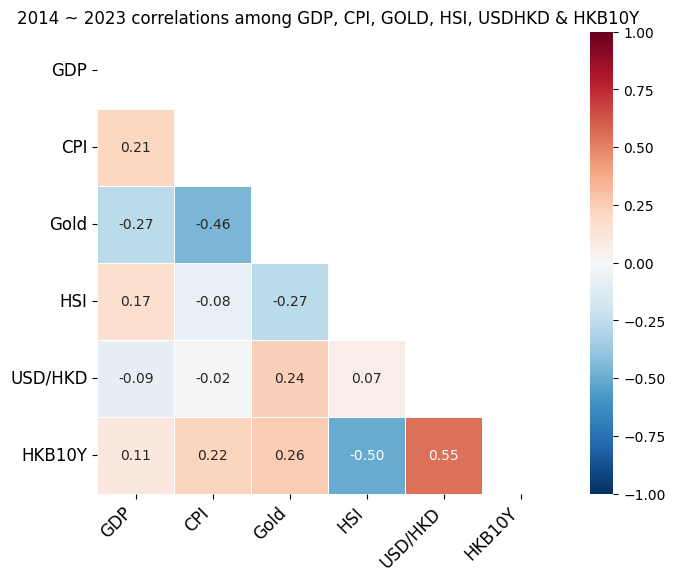

In [ ]:
# define size of graph
plt.figure(figsize = (8, 6))

# Return a copy of an array with the elements below the k-th diagonal zeroed
mask = np.triu(np.ones_like(temp_df1.corr(numeric_only = True), dtype=bool))

# defind the lables on axes of the graph
x_axis_labels = ['GDP', 'CPI', 'Gold', 'HSI', 'USD/HKD', 'HKB10Y']
y_axis_labels = ['GDP', 'CPI', 'Gold', 'HSI', 'USD/HKD', 'HKB10Y']

# plot heatmap to show the correlation among GDP growth, CPI Inflation and 4-asset classes from 'business cycle and asset in 10 years' dataframe on the graph
sns.heatmap(temp_df1.corr(numeric_only = True),
            cmap = 'RdBu_r', vmin = -1, vmax = 1, center = 0, annot = True,
            xticklabels=x_axis_labels, yticklabels=y_axis_labels,
            fmt = ".2f", square = True, linewidths = .5, cbar = True, mask = mask)

# defind the title, rotated lables on axes of the graph
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0, ha='right')

plt.title('2014 ~ 2023 correlations among GDP, CPI, GOLD, HSI, USDHKD & HKB10Y')

#display the graph(s)
plt.show()


### Heatmap for Matrix data between GDP, CPI, GOLD, HSI, USDHKD & HKB10Y (no Log value)
### Obtained from dedicated period:
### Phase 1: '2019-06-01' ~ '2020-05-01'

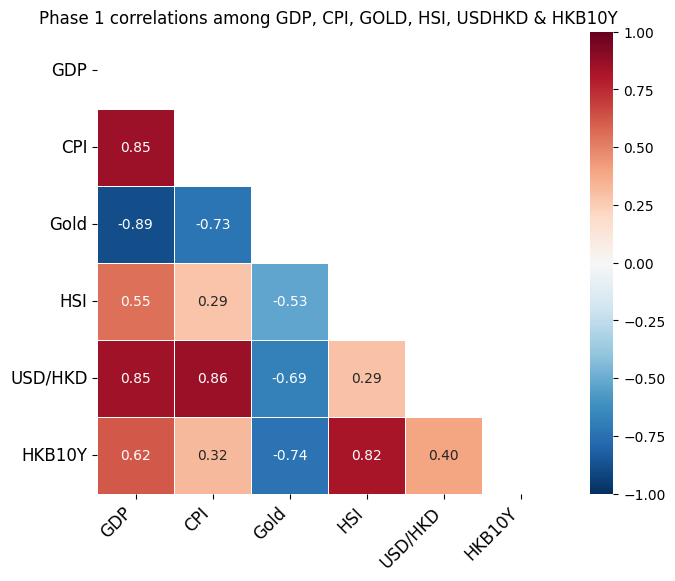

In [ ]:
# truncated the ln values of columns of 'business cycle and asset in phase 1' dataframe for heatmap plotting
df_dedicated1 = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated1.copy()
df_dedicated1.drop(columns=['LValue_XAUUSD','LValue_HSI','LValue_HKB10Y','LValue_USDHKD'], inplace=True)

# define size of graph
plt.figure(figsize = (8, 6))

# Return a copy of an array with the elements below the k-th diagonal zeroed
mask = np.triu(np.ones_like(df_dedicated1.corr(numeric_only = True), dtype=bool))

# defind the lables on axes of the graph
x_axis_labels = ['GDP', 'CPI', 'Gold', 'HSI', 'USD/HKD', 'HKB10Y']
y_axis_labels = ['GDP', 'CPI', 'Gold', 'HSI', 'USD/HKD', 'HKB10Y']

# plot heatmap to show the correlation among GDP growth, CPI Inflation and 4-asset classes from 'business cycle and asset in phase 1' dataframe on the graph
sns.heatmap(df_dedicated1.corr(numeric_only = True),
            cmap = 'RdBu_r', vmin = -1, vmax = 1, center = 0, annot = True,
            xticklabels=x_axis_labels, yticklabels=y_axis_labels,
            fmt = ".2f", square = True, linewidths = .5, cbar = True, mask = mask)

# defind the title, rotated lables on axes of the graph
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0, ha='right')

plt.title('Phase 1 correlations among GDP, CPI, GOLD, HSI, USDHKD & HKB10Y')

#display the graph(s)
plt.show()


### Heatmap for Matrix data between GDP, CPI, GOLD, HSI, USDHKD & HKB10Y (no Log value)
### obtained from dedicated period:
### Phase 2: '2020-05-01' ~ '2020-12-01'

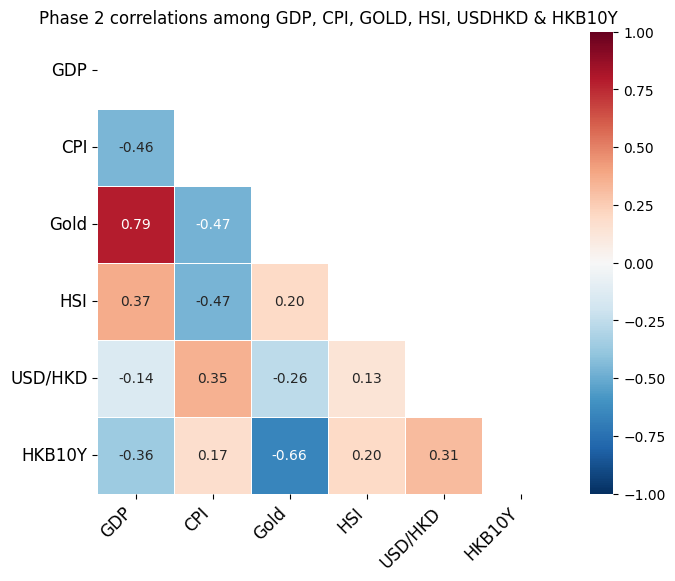

In [ ]:
# truncated the ln values of columns of 'business cycle and asset in phase 2' dataframe for heatmap plotting
df_dedicated2 = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated2.copy()
df_dedicated2.drop(columns=['LValue_XAUUSD','LValue_HSI','LValue_HKB10Y','LValue_USDHKD'], inplace=True)

# define size of graph
plt.figure(figsize = (8, 6))

# Return a copy of an array with the elements below the k-th diagonal zeroed
mask = np.triu(np.ones_like(df_dedicated2.corr(numeric_only = True), dtype=bool))

# defind the lables on axes of the graph
x_axis_labels = ['GDP', 'CPI', 'Gold', 'HSI', 'USD/HKD', 'HKB10Y']
y_axis_labels = ['GDP', 'CPI', 'Gold', 'HSI', 'USD/HKD', 'HKB10Y']

# plot heatmap to show the correlation among GDP growth, CPI Inflation and 4-asset classes from 'business cycle and asset in phase 2' dataframe on the graph
sns.heatmap(df_dedicated2.corr(numeric_only = True),
            cmap = 'RdBu_r', vmin = -1, vmax = 1, center = 0, annot = True,
            xticklabels=x_axis_labels, yticklabels=y_axis_labels,
            fmt = ".2f", square = True, linewidths = .5, cbar = True, mask = mask)

# defind the title, rotated lables on axes of the graph
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0, ha='right')

plt.title('Phase 2 correlations among GDP, CPI, GOLD, HSI, USDHKD & HKB10Y')

#display the graph(s)
plt.show()


### Heatmap for Matrix data between GDP, CPI, GOLD, HSI, USDHKD & HKB10Y (no Log value)
### Obtained from dedicated period:
### Phase 3: '2020-12-01' ~ '2021-03-01'

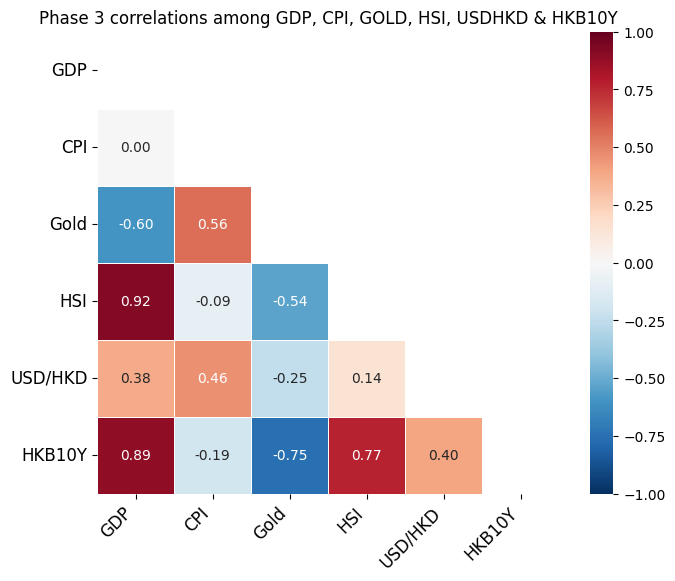

In [ ]:
# truncated the ln values of columns of 'business cycle and asset in phase 3' dataframe for heatmap plotting
df_dedicated3 = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated3.copy()
df_dedicated3.drop(columns=['LValue_XAUUSD','LValue_HSI','LValue_HKB10Y','LValue_USDHKD'], inplace=True)

# define size of graph
plt.figure(figsize = (8, 6))

# Return a copy of an array with the elements below the k-th diagonal zeroed
mask = np.triu(np.ones_like(df_dedicated3.corr(numeric_only = True), dtype=bool))

# defind the lables on axes of the graph
x_axis_labels = ['GDP', 'CPI', 'Gold', 'HSI', 'USD/HKD', 'HKB10Y']
y_axis_labels = ['GDP', 'CPI', 'Gold', 'HSI', 'USD/HKD', 'HKB10Y']

# plot heatmap to show the correlation among GDP growth, CPI Inflation and 4-asset classes from 'business cycle and asset in phase 3' dataframe on the graph
sns.heatmap(df_dedicated3.corr(numeric_only = True),
            cmap = 'RdBu_r', vmin = -1, vmax = 1, center = 0, annot = True,
            xticklabels=x_axis_labels, yticklabels=y_axis_labels,
            fmt = ".2f", square = True, linewidths = .5, cbar = True, mask = mask)

# defind the title, rotated lables on axes of the graph
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0, ha='right')

plt.title('Phase 3 correlations among GDP, CPI, GOLD, HSI, USDHKD & HKB10Y')

#display the graph(s)
plt.show()


### Heatmap for Matrix data between GDP, CPI, GOLD, HSI, USDHKD & HKB10Y (no Log value)
### Obtained from dedicated period:
### Phase 4: '2021-03-01' ~ '2022-01-01'

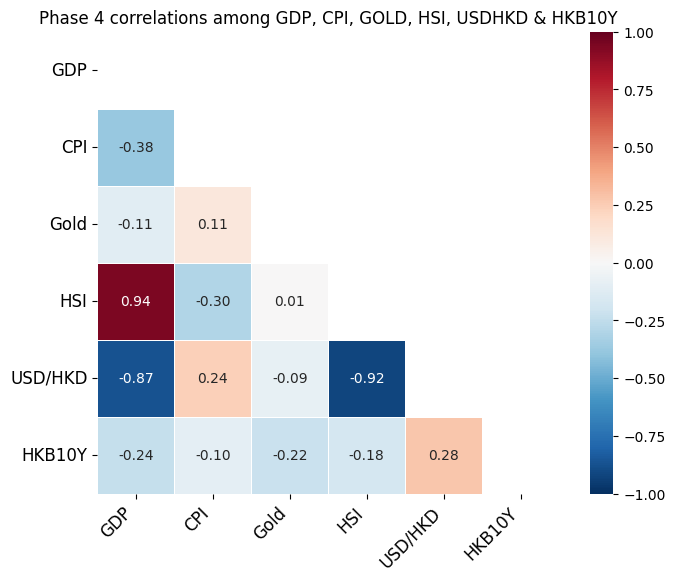

In [ ]:
# truncated the ln values of columns of 'business cycle and asset in phase 4' dataframe for heatmap plotting
df_dedicated4 = df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated4.copy()
df_dedicated4.drop(columns=['LValue_XAUUSD','LValue_HSI','LValue_HKB10Y','LValue_USDHKD'], inplace=True)

# define size of graph
plt.figure(figsize = (8, 6))

# Return a copy of an array with the elements below the k-th diagonal zeroed
mask = np.triu(np.ones_like(df_dedicated4.corr(numeric_only = True), dtype=bool))

# defind the lables on axes of the graph
x_axis_labels = ['GDP', 'CPI', 'Gold', 'HSI', 'USD/HKD', 'HKB10Y']
y_axis_labels = ['GDP', 'CPI', 'Gold', 'HSI', 'USD/HKD', 'HKB10Y']

# plot heatmap to show the correlation among GDP growth, CPI Inflation and 4-asset classes from 'business cycle and asset in phase 4' dataframe on the graph
sns.heatmap(df_dedicated4.corr(numeric_only = True),
            cmap = 'RdBu_r', vmin = -1, vmax = 1, center = 0, annot = True,
            xticklabels=x_axis_labels, yticklabels=y_axis_labels,
            fmt = ".2f", square = True, linewidths = .5, cbar = True, mask = mask)

# defind the title, rotated lables on axes of the graph
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0, ha='right')

plt.title('Phase 4 correlations among GDP, CPI, GOLD, HSI, USDHKD & HKB10Y')

#display the graph(s)
plt.show()


### GDP/CPI vs Gold Figures

### During a period '2014-01-01 ~ 2023-12-31'

In [ ]:
# https://plotly.com/python-api-reference/plotly.graph_objects.html

import plotly.graph_objects as go

# create multiple graphs with subplots
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]],
)

# plot scatter line using 'GDP growth' from 'business cycle and asset in 10 years' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["figure_gdp"], mode='lines', name="GDP growth", line=go.scatter.Line(color="blue")),
    secondary_y=True,
    row=1,
    col=1,
)

# plot scatter line using 'Gold (oz in USD)' from 'business cycle and asset in 10 years' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["Price_XAUUSD"], mode='lines', name="Gold", line=go.scatter.Line(color="yellow"), showlegend=False),
    secondary_y=False,
    row=1,
    col=1,
)

# plot scatter line using 'CPI Inflation' from 'business cycle and asset in 10 years' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["figure_cpi"], mode='lines', name="Inflation", line=go.scatter.Line(color="red")),
    secondary_y=True,
    row=2,
    col=1,
)

# plot scatter line using 'Gold (oz in USD)' from 'business cycle and asset in 10 years' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["Price_XAUUSD"], mode='lines', name="Gold", line=go.scatter.Line(color="yellow")),
    secondary_y=False,
    row=2,
    col=1,
)

# outline the 4 phase business cycles on the graphs
fig.add_vrect(x0='2019-06-01', x1='2020-05-01', col=1,
               annotation_text='1', annotation_position='top left',
               fillcolor='orange', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-05-01', x1='2020-12-01', col=1,
               annotation_text='2', annotation_position='top left',
               fillcolor='green', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-12-01', x1='2021-03-01', col=1,
               annotation_text='3', annotation_position='top left',
               fillcolor='yellow', opacity=0.15, line_width=0)

fig.add_vrect(x0='2021-03-01', x1='2022-01-01', col=1,
               annotation_text='4', annotation_position='top left',
               fillcolor='purple', opacity=0.15, line_width=0)

# define the color of the graphs
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

# defind the title, lables on axes of the graphs
fig.update_layout(margin=dict(l=90, r=25, t=70, b=60))
fig.update_layout(title_text="Gold spot price vs GDP growth and Inflation by CPI" , title_font_size=30)
fig.layout.xaxis2.title="Year"
fig.update_yaxes(title_text='GDP growth', row=1, col=1, secondary_y=True)
fig.update_yaxes(title_text='Gold (oz in USD)', row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text='Inflation', row=2, col=1, secondary_y=True)
fig.update_yaxes(title_text='Gold (oz in USD)', row=2, col=1, secondary_y=False)

#display the graph(s)
fig.show()


### GDP/CPI vs Gold Figures
### Under 4 phases period '2019-06-01 ~ 2022-01-01'

In [ ]:
# https://plotly.com/python-api-reference/plotly.graph_objects.html

import plotly.graph_objects as go

# create multiple graphs with subplots
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]],
)

# plot scatter line using 'GDP growth' from 'business cycle and asset in 4 phases' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["figure_gdp"], mode='lines', name="GDP growth", line=go.scatter.Line(color="blue")),
    secondary_y=True,
    row=1,
    col=1,
)

# plot scatter line using 'Gold (oz in USD)' from 'business cycle and asset in 4 phases' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["Price_XAUUSD"], mode='lines', name="Gold", line=go.scatter.Line(color="yellow"), showlegend=False),
    secondary_y=False,
    row=1,
    col=1,
)

# plot scatter line using 'CPI Inflation' from 'business cycle and asset in 4 phases' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["figure_cpi"], mode='lines', name="Inflation", line=go.scatter.Line(color="red")),
    secondary_y=True,
    row=2,
    col=1,
)

# plot scatter line using 'Gold (oz in USD)' from 'business cycle and asset in 4 phases' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["Price_XAUUSD"], mode='lines', name="Gold", line=go.scatter.Line(color="yellow")),
    secondary_y=False,
    row=2,
    col=1,
)

# outline the 4 phase business cycles on the graphs
fig.add_vrect(x0='2019-06-01', x1='2020-05-01', col=1,
               annotation_text='1', annotation_position='top left',
               fillcolor='orange', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-05-01', x1='2020-12-01', col=1,
               annotation_text='2', annotation_position='top left',
               fillcolor='green', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-12-01', x1='2021-03-01', col=1,
               annotation_text='3', annotation_position='top left',
               fillcolor='yellow', opacity=0.15, line_width=0)

fig.add_vrect(x0='2021-03-01', x1='2022-01-01', col=1,
               annotation_text='4', annotation_position='top left',
               fillcolor='purple', opacity=0.15, line_width=0)

# define the color of the graphs
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

# defind the title, lables on axes of the graphs
fig.update_layout(margin=dict(l=90, r=25, t=70, b=60))
fig.update_layout(title_text="Gold spot price vs GDP growth and Inflation by CPI" , title_font_size=30)
fig.layout.xaxis2.title="Year"
fig.update_yaxes(title_text='GDP growth', row=1, col=1, secondary_y=True)
fig.update_yaxes(title_text='Gold (oz in USD)', row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text='Inflation', row=2, col=1, secondary_y=True)
fig.update_yaxes(title_text='Gold (oz in USD)', row=2, col=1, secondary_y=False)

#display the graph(s)
fig.show()



### GDP/CPI vs HSI Figures

### During a period '2014-01-01 ~ 2023-12-31'

In [ ]:
# https://plotly.com/python-api-reference/plotly.graph_objects.html

import plotly.graph_objects as go


# create multiple graphs with subplots
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]],
)

# plot scatter line using 'GDP growth' from 'business cycle and asset in 10 years' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["figure_gdp"], mode='lines', name="GDP growth", line=go.scatter.Line(color="blue")),
    secondary_y=True,
    row=1,
    col=1,
)

# plot scatter line using 'Hong Kong HSI index' from 'business cycle and asset in 10 years' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["Index_HSI"], mode='lines', name="HSI", line=go.scatter.Line(color="green"), showlegend=False),
    secondary_y=False,
    row=1,
    col=1,
)

# plot scatter line using 'CPI Inflation' from 'business cycle and asset in 10 years' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["figure_cpi"], mode='lines', name="Inflation", line=go.scatter.Line(color="red")),
    secondary_y=True,
    row=2,
    col=1,
)

# plot scatter line using 'Hong Kong HSI index' from 'business cycle and asset in 10 years' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["Index_HSI"], mode='lines', name="HSI", line=go.scatter.Line(color="green")),
    secondary_y=False,
    row=2,
    col=1,
)

# outline the 4 phase business cycles on the graphs
fig.add_vrect(x0='2019-06-01', x1='2020-05-01', col=1,
               annotation_text='1', annotation_position='top left',
               fillcolor='orange', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-05-01', x1='2020-12-01', col=1,
               annotation_text='2', annotation_position='top left',
               fillcolor='green', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-12-01', x1='2021-03-01', col=1,
               annotation_text='3', annotation_position='top left',
               fillcolor='yellow', opacity=0.15, line_width=0)

fig.add_vrect(x0='2021-03-01', x1='2022-01-01', col=1,
               annotation_text='4', annotation_position='top left',
               fillcolor='purple', opacity=0.15, line_width=0)

# define the color of the graphs
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

# defind the title, lables on axes of the graphs
fig.update_layout(margin=dict(l=90, r=25, t=70, b=60))
fig.update_layout(title_text="Hang Seng Index vs GDP growth and Inflation by CPI", title_font_size=30)
fig.layout.xaxis2.title="Year"
fig.update_yaxes(title_text='GDP growth', row=1, col=1, secondary_y=True)
fig.update_yaxes(title_text='Hang Seng Index', row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text='Inflation', row=2, col=1, secondary_y=True)
fig.update_yaxes(title_text='Hang Seng Index', row=2, col=1, secondary_y=False)

#display the graph(s)
fig.show()


### GDP/CPI vs HSI Figures
### Under 4 phases period '2019-06-01 ~ 2022-01-01'

In [ ]:
# https://plotly.com/python-api-reference/plotly.graph_objects.html

import plotly.graph_objects as go

# create multiple graphs with subplots
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]],
)

# plot scatter line using 'GDP growth' from 'business cycle and asset in 4 phases' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["figure_gdp"], mode='lines', name="GDP growth", line=go.scatter.Line(color="blue")),
    secondary_y=True,
    row=1,
    col=1,
)
# plot scatter line using 'Hong Kong HSI index' from 'business cycle and asset in 4 phases' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["Index_HSI"], mode='lines', name="HSI", line=go.scatter.Line(color="green"), showlegend=False),
    secondary_y=False,
    row=1,
    col=1,
)

# plot scatter line using 'CPI Inflation' from 'business cycle and asset in 4 phases' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["figure_cpi"], mode='lines', name="Inflation", line=go.scatter.Line(color="red")),
    secondary_y=True,
    row=2,
    col=1,
)

# plot scatter line using 'Hong Kong HSI index' from 'business cycle and asset in 4 phases' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["Index_HSI"], mode='lines', name="HSI", line=go.scatter.Line(color="green")),
    secondary_y=False,
    row=2,
    col=1,
)

# outline the 4 phase business cycles on the graphs
fig.add_vrect(x0='2019-06-01', x1='2020-05-01', col=1,
               annotation_text='1', annotation_position='top left',
               fillcolor='orange', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-05-01', x1='2020-12-01', col=1,
               annotation_text='2', annotation_position='top left',
               fillcolor='green', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-12-01', x1='2021-03-01', col=1,
               annotation_text='3', annotation_position='top left',
               fillcolor='yellow', opacity=0.15, line_width=0)

fig.add_vrect(x0='2021-03-01', x1='2022-01-01', col=1,
               annotation_text='4', annotation_position='top left',
               fillcolor='purple', opacity=0.15, line_width=0)

# define the color of the graphs
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')


# defind the title, lables on axes of the graphs
fig.update_layout(margin=dict(l=90, r=25, t=70, b=60))
fig.update_layout(title_text="Hang Seng Index vs GDP growth and Inflation by CPI", title_font_size=30)
fig.layout.xaxis2.title="Year"
fig.update_yaxes(title_text='GDP growth', row=1, col=1, secondary_y=True)
fig.update_yaxes(title_text='Hang Seng Index', row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text='Inflation', row=2, col=1, secondary_y=True)
fig.update_yaxes(title_text='Hang Seng Index', row=2, col=1, secondary_y=False)

#display the graph(s)
fig.show()


### GDP/CPI vs USDHKD Figures

### During a period '2014-01-01 ~ 2023-12-31'

In [ ]:
# https://plotly.com/python-api-reference/plotly.graph_objects.html

import plotly.graph_objects as go

# create multiple graphs with subplots
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]],
)

# plot scatter line using 'GDP growth' from 'business cycle and asset in 10 years' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["figure_gdp"], mode='lines', name="GDP growth", line=go.scatter.Line(color="blue")),
    secondary_y=True,
    row=1,
    col=1,
)

# plot scatter line using 'USD/HKD' from 'business cycle and asset in 10 years' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["Price_USDHKD"], mode='lines', name="USDHKD", line=go.scatter.Line(color="purple"), showlegend=False),
    secondary_y=False,
    row=1,
    col=1,
)
# plot scatter line using 'CPI Inflation' from 'business cycle and asset in 10 years' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["figure_cpi"], mode='lines', name="Inflation", line=go.scatter.Line(color="red")),
    secondary_y=True,
    row=2,
    col=1,
)

# plot scatter line using 'USD/HKD' from 'business cycle and asset in 10 years' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["Price_USDHKD"], mode='lines', name="USDHKD", line=go.scatter.Line(color="purple")),
    secondary_y=False,
    row=2,
    col=1,
)

# outline the 4 phase business cycles on the graphs
fig.add_vrect(x0='2019-06-01', x1='2020-05-01', col=1,
               annotation_text='1', annotation_position='top left',
               fillcolor='orange', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-05-01', x1='2020-12-01', col=1,
               annotation_text='2', annotation_position='top left',
               fillcolor='green', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-12-01', x1='2021-03-01', col=1,
               annotation_text='3', annotation_position='top left',
               fillcolor='yellow', opacity=0.15, line_width=0)

fig.add_vrect(x0='2021-03-01', x1='2022-01-01', col=1,
               annotation_text='4', annotation_position='top left',
               fillcolor='purple', opacity=0.15, line_width=0)

# define the color of the graphs
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

# defind the title, lables on axes of the graphs
fig.update_layout(margin=dict(l=90, r=25, t=70, b=60))
fig.update_layout(title_text="USD/HKD vs GDP growth and Inflation by CPI", title_font_size=30)
fig.layout.xaxis2.title="Year"
fig.update_yaxes(title_text='GDP growth', row=1, col=1, secondary_y=True)
fig.update_yaxes(title_text='USD/HKD', row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text='Inflation', row=2, col=1, secondary_y=True)
fig.update_yaxes(title_text='USD/HKD', row=2, col=1, secondary_y=False)

# defind the numeric range in y axes of USD/HKD on the graphs
fig.update_yaxes(range = [7.5, 8], row=1, col=1, secondary_y=False)
fig.update_yaxes(range = [7.5, 8], row=2, col=1, secondary_y=False)

#display the graph(s)
fig.show()


### GDP/CPI vs USDHKD Figures
### Under 4 phases period '2019-06-01 ~ 2022-01-01'

In [ ]:
# https://plotly.com/python-api-reference/plotly.graph_objects.html

import plotly.graph_objects as go

# create multiple graphs with subplots
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]],
)

# plot scatter line using 'GDP growth' from 'business cycle and asset in 4 phases' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["figure_gdp"], mode='lines', name="GDP growth", line=go.scatter.Line(color="blue")),
    secondary_y=True,
    row=1,
    col=1,
)

# plot scatter line using 'USD/HKD' from 'business cycle and asset in 4 phases' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["Price_USDHKD"], mode='lines', name="USDHKD", line=go.scatter.Line(color="purple"), showlegend=False),
    secondary_y=False,
    row=1,
    col=1,
)

# plot scatter line using 'CPI Inflation' from 'business cycle and asset in 4 phases' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["figure_cpi"], mode='lines', name="Inflation", line=go.scatter.Line(color="red")),
    secondary_y=True,
    row=2,
    col=1,
)

# plot scatter line using 'USD/HKD' from 'business cycle and asset in 4 phases' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["Price_USDHKD"], mode='lines', name="USDHKD", line=go.scatter.Line(color="purple")),
    secondary_y=False,
    row=2,
    col=1,
)

# outline the 4 phase business cycles on the graphs
fig.add_vrect(x0='2019-06-01', x1='2020-05-01', col=1,
               annotation_text='1', annotation_position='top left',
               fillcolor='orange', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-05-01', x1='2020-12-01', col=1,
               annotation_text='2', annotation_position='top left',
               fillcolor='green', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-12-01', x1='2021-03-01', col=1,
               annotation_text='3', annotation_position='top left',
               fillcolor='yellow', opacity=0.15, line_width=0)

fig.add_vrect(x0='2021-03-01', x1='2022-01-01', col=1,
               annotation_text='4', annotation_position='top left',
               fillcolor='purple', opacity=0.15, line_width=0)

# define the color of the graphs
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

# defind the title, lables on axes of the graphs
fig.update_layout(margin=dict(l=90, r=25, t=70, b=60))
fig.update_layout(title_text="USD/HKD vs GDP growth and Inflation by CPI", title_font_size=30)
fig.layout.xaxis2.title="Year"
fig.update_yaxes(title_text='GDP growth', row=1, col=1, secondary_y=True)
fig.update_yaxes(title_text='USD/HKD', row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text='Inflation', row=2, col=1, secondary_y=True)
fig.update_yaxes(title_text='USD/HKD', row=2, col=1, secondary_y=False)

# defind the numeric range in y axes of USD/HKD on the graphs
fig.update_yaxes(range = [7.5, 8], row=1, col=1, secondary_y=False)
fig.update_yaxes(range = [7.5, 8], row=2, col=1, secondary_y=False)

#display the graph(s)
fig.show()


### GDP/CPI vs HKB10Y Figures

### During a period '2014-01-01 ~ 2023-12-31'

In [ ]:
# https://plotly.com/python-api-reference/plotly.graph_objects.html

import plotly.graph_objects as go

# create multiple graphs with subplots
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]],
)

# plot scatter line using 'GDP growth' from 'business cycle and asset in 10 years' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["figure_gdp"], mode='lines', name="GDP growth", line=go.scatter.Line(color="blue")),
    secondary_y=True,
    row=1,
    col=1,
)

# plot scatter line using 'Hong Kong 10-year bond' from 'business cycle and asset in 10 years' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["CIndex_HKB10Y"], mode='lines', name="HKB10Y", line=go.scatter.Line(color="orange"), showlegend=False),
    secondary_y=False,
    row=1,
    col=1,
)

# plot scatter line using 'CPI Inflation' from 'business cycle and asset in 10 years' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["figure_cpi"], mode='lines', name="Inflation", line=go.scatter.Line(color="red")),
    secondary_y=True,
    row=2,
    col=1,
)

# plot scatter line using 'Hong Kong 10-year bond' from 'business cycle and asset in 10 years' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y["CIndex_HKB10Y"], mode='lines', name="HKB10Y", line=go.scatter.Line(color="orange")),
    secondary_y=False,
    row=2,
    col=1,
)

# outline the 4 phase business cycles on the graphs
fig.add_vrect(x0='2019-06-01', x1='2020-05-01', col=1,
               annotation_text='1', annotation_position='top left',
               fillcolor='orange', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-05-01', x1='2020-12-01', col=1,
               annotation_text='2', annotation_position='top left',
               fillcolor='green', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-12-01', x1='2021-03-01', col=1,
               annotation_text='3', annotation_position='top left',
               fillcolor='yellow', opacity=0.15, line_width=0)

fig.add_vrect(x0='2021-03-01', x1='2022-01-01', col=1,
               annotation_text='4', annotation_position='top left',
               fillcolor='purple', opacity=0.15, line_width=0)

# define the color of the graphs
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

# defind the title, lables on axes of the graphs
fig.update_layout(margin=dict(l=90, r=25, t=70, b=60))
fig.update_layout(title_text="HKG 10-year bond yield (%) vs GDP growth and Inflation by CPI", title_font_size=30)
fig.layout.xaxis2.title="Year"
fig.update_yaxes(title_text='GDP growth', row=1, col=1, secondary_y=True)
fig.update_yaxes(title_text='HKB10 yield (%)', row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text='Inflation', row=2, col=1, secondary_y=True)
fig.update_yaxes(title_text='HKB10 yield (%)', row=2, col=1, secondary_y=False)

#display the graph(s)
fig.show()


### GDP/CPI vs USDHKD Figures
### Under 4 phases period '2019-06-01 ~ 2022-01-01'

In [ ]:
# https://plotly.com/python-api-reference/plotly.graph_objects.html

import plotly.graph_objects as go

# create multiple graphs with subplots
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]],
)

# plot scatter line using 'GDP growth' from 'business cycles and asset in 4 phases' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["figure_gdp"], mode='lines', name="GDP growth", line=go.scatter.Line(color="blue")),
    secondary_y=True,
    row=1,
    col=1,
)

# plot scatter line using 'Hong Kong 10-year bond' from 'business cycle and asset in 4 phases' dataframe on the top graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["CIndex_HKB10Y"], mode='lines', name="HKB10Y", line=go.scatter.Line(color="orange"), showlegend=False),
    secondary_y=False,
    row=1,
    col=1,
)

# plot scatter line using 'CPI Inflation' from 'business cycle and asset in 4 phases' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["figure_cpi"], mode='lines', name="Inflation", line=go.scatter.Line(color="red")),
    secondary_y=True,
    row=2,
    col=1,
)

# plot scatter line using 'Hong Kong 10-year bond' from 'business cycle and asset in 4 phases' dataframe at the bottom graph
fig.add_trace(
    go.Scatter(x=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated.index, y=df_GDP_CPI_XAUUSD_HSI_USDHKD_HKB10Y_dedicated["CIndex_HKB10Y"], mode='lines', name="HKB10Y", line=go.scatter.Line(color="orange")),
    secondary_y=False,
    row=2,
    col=1,
)

# outline the 4 phase business cycle on the graphs
fig.add_vrect(x0='2019-06-01', x1='2020-05-01', col=1,
               annotation_text='1', annotation_position='top left',
               fillcolor='orange', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-05-01', x1='2020-12-01', col=1,
               annotation_text='2', annotation_position='top left',
               fillcolor='green', opacity=0.15, line_width=0)

fig.add_vrect(x0='2020-12-01', x1='2021-03-01', col=1,
               annotation_text='3', annotation_position='top left',
               fillcolor='yellow', opacity=0.15, line_width=0)

fig.add_vrect(x0='2021-03-01', x1='2022-01-01', col=1,
               annotation_text='4', annotation_position='top left',
               fillcolor='purple', opacity=0.15, line_width=0)

# define the color of the graphs
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')

# defind the title, lables on axes of the graphs
fig.update_layout(margin=dict(l=90, r=25, t=70, b=60))
fig.update_layout(title_text="HKG 10-year bond yield (%) vs GDP growth and Inflation by CPI", title_font_size=30)
fig.layout.xaxis2.title="Year"
fig.update_yaxes(title_text='GDP growth', row=1, col=1, secondary_y=True)
fig.update_yaxes(title_text='HKB10 yield (%)', row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text='Inflation', row=2, col=1, secondary_y=True)
fig.update_yaxes(title_text='HKB10 yield (%)', row=2, col=1, secondary_y=False)

#display the graph(s)
fig.show()
